# Полиномиальная регрессия


Цель этого набора данных — облегчить разработку и тестирование регрессионных моделей для прогнозирования страховых премий на основе различных характеристик клиентов и деталей полиса.  
Страховые компании часто полагаются на основанные на данных подходы для оценки премий, принимая во внимание такие факторы, как возраст, доход, состояние здоровья и история претензий.   
Этот синтетический набор данных имитирует реальные сценарии, чтобы помочь практикующим специалистам практиковать проектирование признаков, очистку данных и обучение моделей. 

Обзор набора данных
Этот набор данных содержит 2Lk+ и 20 признаков с комбинацией категориальных, числовых и текстовых данных.  
Он включает пропущенные значения, неверные типы данных и перекошенные распределения для имитации сложностей, с которыми сталкиваются реальные наборы данных.  
Целевая переменная для прогнозирования — «Premium Amount».

Признаки (столбцы):  
Возраст  Age : Возраст застрахованного лица (числовой)  
Пол Gender : Пол застрахованного лица (Категория: Мужской, Женский)  
Годовой доход Annual Income : Годовой доход застрахованного лица (числовой, асимметричный)  
Семейное положение Marital Status : Семейное положение застрахованного лица (категория: холост, женат, разведен)  
Количество иждивенцев Number of Dependents : Количество иждивенцев (числовое, с пропущенными значениями)  
Уровень образования Education Level : наивысший достигнутый уровень образования (категория: средняя школа, бакалавр, магистр, доктор философии)  
Род занятий Occupation : Род занятий застрахованного лица (категория: работающий по найму, самозанятый, безработный)  
Оценка состояния здоровья Health Score : оценка, отражающая состояние здоровья (числовая, асимметричная)  
Местоположение Location : Тип местоположения (Категория: Город, Пригород, Сельская местность)  
Тип полиса Policy Type : Тип страхового полиса (Категорийный: Базовый, Комплексный, Премиум)  
Предыдущие заявления Previous Claims : Количество предыдущих заявлений (числовое, с выбросами)  
Возраст транспортного средства Vehicle Age : Возраст застрахованного транспортного средства (числовой)  
Кредитный рейтинг Credit Score : кредитный рейтинг застрахованного лица (числовой, с отсутствующими значениями)  
Срок действия страхового полиса Insurance Duration : Срок действия страхового полиса (числовой, в годах)  
Дата начала действия полиса Policy Start Date : Дата начала действия страхового полиса (Текст, неправильно отформатирован)  
Отзывы клиентов Customer Feedback : краткие отзывы клиентов (текст)  
Статус курения  Smoking Status  : Статус курения застрахованного лица (Категория: Да, Нет)  
Частота упражнений Exercise Frequency : Частота упражнений (Категория: Ежедневно, Еженедельно, Ежемесячно, Редко)  
Тип недвижимости  Property Type : Тип собственности (Категория: Дом, Квартира, Кондоминиум)  

Целевая переменная:  
Сумма страховой премии Premium Amount : целевая переменная, представляющая сумму страховой премии (числовая, асимметричная)  

In [238]:
!which python 

/home/maksim/develops/python/MAKSIM/.venv/bin/python


## Импорты

In [308]:
 
import matplotlib.pyplot as plt  
import pathlib 
import pandas as pd
import numpy as np
from glob import glob
import os 
import seaborn as sns
import matplotlib.pyplot as plt

import torch  
from torchsummary import summary


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,  MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import root_mean_squared_log_error

## Проверка устройства GPU

In [240]:
# устанавливаем device если gpu или cpu
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("работаем на устройстве: ", device)
print('Версия torch:           ', torch.__version__)
print("версия  cuDNN:          ", torch.backends.cudnn.version())

# ПРОВЕРКА GPU
!nvidia-smi

работаем на устройстве:  cuda
Версия torch:            2.6.0+cu124
версия  cuDNN:           90100
Mon Feb 17 21:50:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060        Off |   00000000:01:00.0  On |                  N/A |
|  0%   55C    P8             22W /  170W |     743MiB /  12288MiB |     40%      Default |
|                                         

## Очистка GPU

In [241]:
torch.cuda.empty_cache()  

## Текущее положение

In [242]:
# Текущее положение
path_1 = os.getcwd()
path_1

'/home/maksim/develops/python/MAKSIM/ML/Polinom_regression'

## Просмотр расположения датасета

In [243]:
!ls dataset

sample_submission.csv  test.csv  train.csv


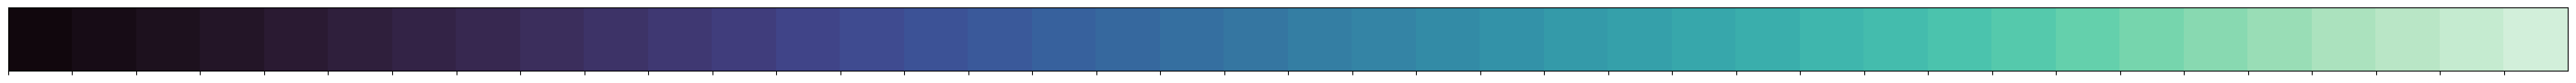

In [244]:
current_palette = sns.color_palette('mako', 40)
sns.palplot(current_palette)

## Функции

In [245]:
def plot_histogram_box(data, col='Premium Amount'):
    ''' 
        Функция построения графиков попарно, гистограмма и Ящик с усами
    '''
    # Создаем два графика в одной строке (1 строка, 2 столбца)
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Гистограмма
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(f'{col}')
    axes[0].set_ylabel('Частота')

    # Boxplot (ящик с усами)
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f'Ящик с усами  {col}')
    axes[1].set_xlabel(f'{col}')

    # Показываем оба графика в одном окне
    plt.tight_layout()
    plt.show()

In [246]:
def plot_histogram_chart(data, col=''):
    ''' 
        Функция построения графиков попарно, гистограмма и круговой
    '''
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

    # Гистограмма (countplot)
    sns.countplot(x=data[col], ax=axes[0])
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Частота')
    axes[0].tick_params(axis='x', rotation=45)  

    # Pie chart (круговая диаграмма)
    data[col].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='Set3')
    axes[1].set_title(f'Распределение категорий в {col}')
    axes[1].set_ylabel('')  
    # Выводим оба графика
    plt.tight_layout()
    plt.show()
    

In [247]:
def plot_analize_data(data1, num_col_del, cat_col_del):
    ''' 
        Строит в цикле попарно графики для числовых и категориальных столбцов
    '''
    data = data1.drop(columns=num_col_del, errors='ignore')  
    numeric_columns = data.select_dtypes(include=[np.number])  # Выбираем числовые столбцы

    for col in numeric_columns.columns:
        plot_histogram_box(data, col)
        
        
    # Выбираем категориальные столбцы (кроме 'Policy Start Date')
    data2 = data1.drop(columns=cat_col_del, errors='ignore')
    categorical_columns = data2.select_dtypes(exclude=[np.number])
    

    # Визуализация категориальных признаков
    for col in categorical_columns.columns:
        plot_histogram_chart(data2, col)

In [248]:
def analiz_data(data):
    ''' 
        Анализ данных
    '''
    # Выбираем только числовые столбцы
    numeric_columns = data.select_dtypes(include=[np.number])
    eda_results = pd.DataFrame({
    "Доля пропусков (%)": numeric_columns.isnull().mean() * 100,
    "Максимальное значение": numeric_columns.max(),
    "Минимальное значение": numeric_columns.min(),
    "Среднее значение": numeric_columns.mean(),
    "Медиана": numeric_columns.median(),
    "Дисперсия": numeric_columns.var(),
    "Квантиль 0.1": numeric_columns.quantile(0.1),
    "Квантиль 0.9": numeric_columns.quantile(0.9),
    "Квартиль 1 (25%)": numeric_columns.quantile(0.25),
    "Квартиль 3 (75%)": numeric_columns.quantile(0.75)
    })

    # Выбираем только категориальные столбцы
    categorical_columns = data.select_dtypes(exclude=[np.number])
    # Рассчитываем статистики
    eda_categorical = pd.DataFrame({
        "Доля пропусков (%)": categorical_columns.isnull().mean() * 100,
        "Количество уникальных значений": categorical_columns.nunique(),
        "Наиболее частое значение (мода)": categorical_columns.mode().iloc[0],
        "Частота моды (%)": categorical_columns.apply(lambda x: x.value_counts(normalize=True).iloc[0] * 100)
    })

    # Выводим результаты
    print("Числовые признаки: \n")
    print(eda_results.to_string())
    print("\nКатегориальные признаки: \n")
    print(eda_categorical.to_string())
    
    return numeric_columns, categorical_columns

In [249]:

def encode_categorical_features(data):
    """
    Кодирует категориальные признаки:
    - Label Encoding для порядковых категорий (Education Level, Exercise Frequency, Policy Type, Location, Occupation)
    - One-Hot Encoding для номинальных категорий (Gender, Marital Status, Smoking Status)
    """

    # 1. Определяем категории
    ordinal_features = ["Education Level", "Exercise Frequency", "Policy Type", "Location", "Occupation"]  # Порядковые категории
    nominal_features = ["Gender", "Marital Status", "Smoking Status"]  # Номинальные категории

    # 2. Кодируем 'Policy Type' вручную
    policy_mapping = {"Basic": 0, "Comprehensive": 1, "Premium": 2}
    if "Policy Type" in data.columns:
        data["Policy Type"] = data["Policy Type"].map(policy_mapping)
        print("Столбец 'Policy Type' закодирован как:", policy_mapping)

    # 3. Кодируем 'Location' вручную
    location_mapping = {"Rural": 0, "Suburban": 1, "Urban": 2}
    if "Location" in data.columns:
        data["Location"] = data["Location"].map(location_mapping)
        print("Столбец 'Location' закодирован как:", location_mapping)

    # 4. Кодируем 'Occupation' вручную
    occupation_mapping = {"Unemployed": 0, "Self-Employed": 1, "Employed": 2}
    if "Occupation" in data.columns:
        data["Occupation"] = data["Occupation"].map(occupation_mapping)
        print("Столбец 'Occupation' закодирован как:", occupation_mapping)

    # 5. Label Encoding для остальных порядковых переменных
    label_encoders = {}
    for col in ordinal_features:
        if col in data.columns and col not in ["Policy Type", "Location", "Occupation"]:  # Эти уже закодированы вручную
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le  # Сохраняем энкодер (для обратного преобразования)

    # 6. One-Hot Encoding для номинальных переменных
    data = pd.get_dummies(data, columns=nominal_features, drop_first=True)  # drop_first=True уменьшает размерность

    return data, label_encoders



In [250]:
def handle_missing_values(data, threshold=35):
    """
    Обрабатывает пропущенные значения:
    - Удаляет столбцы, если пропусков > threshold%
    - 'Number of Dependents' → 0
    - 'Credit Score' → среднее значение
    - 'Property Type' → 'Apartment' (самая частая категория)
    - 'Property Type' → Кодируем: Apartment=0, Condo=1, House=2
    - Остальные числовые столбцы → медиана
    - Категориальные столбцы → мода
    """

    # 1. Считаем процент пропусков в каждом столбце
    missing_percent = data.isnull().mean() * 100

    # 2. Удаляем столбцы, если пропусков > threshold%
    cols_to_drop = missing_percent[missing_percent > threshold].index
    data = data.drop(columns=cols_to_drop)
    print(f"Удалены столбцы с более чем {threshold}% пропусков: {list(cols_to_drop)}\n")

    # 3. Заполняем пропуски в "Number of Dependents" значением 0
    if "Number of Dependents" in data.columns:
        data["Number of Dependents"].fillna(0, inplace=True)
        print("Пропуски в 'Number of Dependents' заменены на 0.\n")

    # 4. Заполняем пропуски в "Credit Score" средним значением
    if "Credit Score" in data.columns:
        mean_credit_score = data["Credit Score"].mean()
        data["Credit Score"].fillna(mean_credit_score, inplace=True)
        print(f"Пропуски в 'Credit Score' заменены на среднее: {mean_credit_score:.2f}\n")

    # 5. Заполняем пропуски в "Property Type")
    if "Property Type" in data.columns:
        data["Property Type"].fillna("House", inplace=True)
        print("Пропуски в 'Property Type' заменены на 'House'.\n")

        # Кодируем 'Property Type' в порядке возрастания
        property_mapping = {"Apartment": 0, "Condo": 1, "House": 2}
        data["Property Type"] = data["Property Type"].map(property_mapping)
        print("Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.\n")

    # 6. Заполняем оставшиеся числовые столбцы медианой
    numeric_columns = data.select_dtypes(include=[np.number]).drop(columns=["Number of Dependents", "Credit Score"], errors="ignore")
    data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

    # 7. Заполняем остальные категориальные столбцы модой
    categorical_columns = data.select_dtypes(exclude=[np.number])
    for col in categorical_columns.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

    return data



In [251]:
def normalize_data(data, method="standard"):
    """
    Нормализует числовые данные.
    method="standard" → StandardScaler (приводит к среднему 0 и std=1)
    method="minmax" → MinMaxScaler (масштабирует от 0 до 1)
    """

    numeric_columns = data.select_dtypes(include=[np.number]).columns  # Только числовые столбцы
    scaler = StandardScaler() if method == "standard" else MinMaxScaler()

    # Применяем масштабирование только к числовым столбцам
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    return data

## 1) Загрузка данных

In [252]:
# Загрузка данных
train_path = "dataset/train.csv"
test_path = "dataset/test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Просмотр первых строк
print(train_data.head().to_string(index=False))


 id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type  Premium Amount
  0 19.0 Female        10049.0        Married                   1.0      Bachelor's Self-Employed     22.598761    Urban       Premium              2.0         17.0         372.0                 5.0 2023-12-23 15:21:39.134960              Poor             No             Weekly         House          2869.0
  1 39.0 Female        31678.0       Divorced                   3.0        Master's           NaN     15.569731    Rural Comprehensive              1.0         12.0         694.0                 2.0 2023-06-12 15:21:39.111551           Average            Yes            Monthly         House          1483.0
  2 23.0   Male        25602.0       Divorced                   3.0     High

In [253]:
print(test_data.head().to_string(index=False))

     id  Age Gender  Annual Income Marital Status  Number of Dependents Education Level    Occupation  Health Score Location   Policy Type  Previous Claims  Vehicle Age  Credit Score  Insurance Duration          Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type
1200000 28.0 Female         2310.0            NaN                   4.0      Bachelor's Self-Employed      7.657981    Rural         Basic              NaN         19.0           NaN                 1.0 2023-06-04 15:21:39.245086              Poor            Yes             Weekly         House
1200001 31.0 Female       126031.0        Married                   2.0        Master's Self-Employed     13.381379 Suburban       Premium              NaN         14.0         372.0                 8.0 2024-04-22 15:21:39.224915              Good            Yes             Rarely     Apartment
1200002 47.0 Female        17092.0       Divorced                   0.0             PhD    Unemployed     24.354

In [254]:
train_data.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [255]:
train_data.shape

(1200000, 21)

## 2) Анализ данных

In [256]:
# Оставляем только числовые столбцы
numeric_data = train_data.select_dtypes(include=[np.number])

# Вычисляем статистики
statistics = {
    "Доля пропусков": train_data.isnull().mean(),
    "Максимум": numeric_data.max(),
    "Минимум": numeric_data.min(),
    "Среднее": numeric_data.mean(),
    "Медиана": numeric_data.median(),
    "Дисперсия": numeric_data.var(),
    "Квантиль 0.1": numeric_data.quantile(0.1),
    "Квантиль 0.9": numeric_data.quantile(0.9),
    "Квартиль 1": numeric_data.quantile(0.25),
    "Квартиль 3": numeric_data.quantile(0.75),
}

# Преобразуем в DataFrame для удобного просмотра
statistics_df = pd.DataFrame(statistics)
# Выводим результат
print(statistics_df.to_string())

                      Доля пропусков      Максимум     Минимум        Среднее        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9     Квартиль 1     Квартиль 3
Age                     1.558750e-02  6.400000e+01   18.000000      41.145563      41.000000  1.833302e+02      22.000000  6.000000e+01      30.000000      53.000000
Annual Income           3.745750e-02  1.499970e+05    1.000000   32745.217777   23911.000000  1.035521e+09    2627.000000  8.107500e+04    8001.000000   44634.000000
Credit Score            1.149017e-01  8.490000e+02  300.000000     592.924350     595.000000  2.249458e+04     383.000000  7.920000e+02     468.000000     721.000000
Customer Feedback       6.485333e-02           NaN         NaN            NaN            NaN           NaN            NaN           NaN            NaN            NaN
Education Level         0.000000e+00           NaN         NaN            NaN            NaN           NaN            NaN           NaN            NaN            NaN
Exer

### Категориальные переменные

In [257]:
categorical_columns = train_data.select_dtypes(exclude=[np.number])
print("Категориальные столбцы:")
print(categorical_columns.nunique())  # Количество уникальных значений в каждом категориальном столбце

Категориальные столбцы:
Gender                     2
Marital Status             3
Education Level            4
Occupation                 3
Location                   3
Policy Type                3
Policy Start Date     167381
Customer Feedback          3
Smoking Status             2
Exercise Frequency         4
Property Type              3
dtype: int64


In [258]:
categorical_columns

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...
1199995,Female,Married,Master's,Unemployed,Urban,Premium,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment
1199996,Male,Divorced,Master's,Self-Employed,Rural,Comprehensive,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment
1199997,Male,Divorced,Master's,NaN,Suburban,Basic,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo
1199998,Male,Single,PhD,NaN,Suburban,Premium,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment


### Числовые переменные

In [259]:
numeric_columns = train_data.select_dtypes(include=[np.number])
print("Числовые столбцы:")
print(numeric_columns.nunique()) 

Числовые столбцы:
id                      1200000
Age                          47
Annual Income             88593
Number of Dependents          5
Health Score             532657
Previous Claims              10
Vehicle Age                  20
Credit Score                550
Insurance Duration            9
Premium Amount             4794
dtype: int64


In [260]:
numeric_columns

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,NaN,3.0,567.0
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0
...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,NaN,5.0,372.0,3.0,1303.0
1199996,1199996,54.0,35786.0,NaN,11.483482,NaN,10.0,597.0,4.0,821.0
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,NaN,6.0,371.0
1199998,1199998,55.0,NaN,1.0,18.547381,1.0,7.0,407.0,4.0,596.0


In [261]:
print(numeric_columns.describe().to_string())


                 id           Age  Annual Income  Number of Dependents  Health Score  Previous Claims   Vehicle Age  Credit Score  Insurance Duration  Premium Amount
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06        1.199999e+06    1.200000e+06
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00  2.561391e+01         1.002689  9.569889e+00  5.929244e+02        5.018219e+00    1.102545e+03
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00  1.220346e+01         0.982840  5.776189e+00  1.499819e+02        2.594331e+00    8.649989e+02
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00  2.012237e+00         0.000000  0.000000e+00  3.000000e+02        1.000000e+00    2.000000e+01
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00  1.591896e+01         0.000000  5.000000e+00  4.680000e+02        3.000000e+00    5.140000e+02
50% 

In [262]:
binary_columns = numeric_columns.columns[numeric_columns.nunique() == 2]
print("Бинарные числовые столбцы:", list(binary_columns))


Бинарные числовые столбцы: []


In [263]:
   
numeric_columns, categorical_columns = analiz_data(train_data)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                              0.000000           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000     899999.250000
Age                             1.558750           6.400000e+01             18.000000         41.145563      41.000000  1.833302e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                   3.745750           1.499970e+05              1.000000      32745.217777   23911.000000  1.035521e+09    2627.000000  8.107500e+04       8001.000000      44634.000000
Number of Dependents            9.139333           4.000000e+00              0.000000          2.009934       2.000000  2.008846e+00       0.000000  4.000000e+00          1.000000        

In [264]:
# Восстанавливаем DataFrame после анализа
train_data_processed = pd.concat([numeric_columns, categorical_columns], axis=1)

# Проверяем размерность (должно быть таким же, как train_data)
print(train_data_processed.shape)
print(train_data_processed.head().to_string())


(1200000, 21)
   id   Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Gender Marital Status Education Level     Occupation  Location    Policy Type           Policy Start Date Customer Feedback Smoking Status Exercise Frequency Property Type
0   0  19.0        10049.0                   1.0     22.598761              2.0         17.0         372.0                 5.0          2869.0  Female        Married      Bachelor's  Self-Employed     Urban        Premium  2023-12-23 15:21:39.134960              Poor             No             Weekly         House
1   1  39.0        31678.0                   3.0     15.569731              1.0         12.0         694.0                 2.0          1483.0  Female       Divorced        Master's            NaN     Rural  Comprehensive  2023-06-12 15:21:39.111551           Average            Yes            Monthly         House
2   2  23.0        25602.0            

In [265]:
# Применяем к train_data_processed
train_data_cleaned = handle_missing_values(train_data_processed)


Удалены столбцы с более чем 35% пропусков: []

Пропуски в 'Number of Dependents' заменены на 0.

Пропуски в 'Credit Score' заменены на среднее: 592.92

Пропуски в 'Property Type' заменены на 'House'.

Столбец 'Property Type' закодирован: Apartment=0, Condo=1, House=2.



/tmp/ipykernel_21832/3635395016.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Number of Dependents"].fillna(0, inplace=True)
/tmp/ipykernel_21832/3635395016.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Проверка с исправленными данными

In [266]:
numeric_columns, categorical_columns = analiz_data(train_data_cleaned)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

In [267]:
train_data_cleaned["Location"].unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

In [268]:
# Применяем кодирование к train_data
train_data_encoded, label_encoders = encode_categorical_features(train_data_cleaned)

# Вывод первых строк после кодирования
print(train_data_encoded.head().to_string())


Столбец 'Policy Type' закодирован как: {'Basic': 0, 'Comprehensive': 1, 'Premium': 2}
Столбец 'Location' закодирован как: {'Rural': 0, 'Suburban': 1, 'Urban': 2}
Столбец 'Occupation' закодирован как: {'Unemployed': 0, 'Self-Employed': 1, 'Employed': 2}
   id   Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type           Policy Start Date Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
0   0  19.0        10049.0                   1.0     22.598761              2.0         17.0     372.00000                 5.0          2869.0                0           1         2            2  2023-12-23 15:21:39.134960              Poor                   3              2        False                    True                  False               False
1   1  39.0        31678.0         

Категориальные столбцы:  
Gender                     2   
Marital Status             3   
Education Level            4   
Occupation                 3  
Location                   3  
Policy Type                3   
Policy Start Date     166598  
Customer Feedback          3   
Smoking Status             2  
Exercise Frequency         4  
Property Type              3  


#### Не обработан  столбец:   __Policy Start Date__

In [269]:
print(train_data_encoded["Policy Start Date"])


0          2023-12-23 15:21:39.134960
1          2023-06-12 15:21:39.111551
2          2023-09-30 15:21:39.221386
3          2024-06-12 15:21:39.226954
4          2021-12-01 15:21:39.252145
                      ...            
1199995    2023-05-03 15:21:39.257696
1199996    2022-09-10 15:21:39.134960
1199997    2021-05-25 15:21:39.106582
1199998    2021-09-19 15:21:39.190215
1199999    2020-08-26 15:21:39.155231
Name: Policy Start Date, Length: 1200000, dtype: object


#### Тип столбца: __object__

#### Преобразуем столбец

In [270]:
# Преобразуем в datetime (если ещё не сделано)
train_data_encoded["Policy Start Date"] = pd.to_datetime(train_data_encoded["Policy Start Date"])

# Извлекаем только год
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].dt.year  

# Сортируем список уникальных годов
unique_years = sorted(train_data_encoded["Policy Start Date"].unique())

# Создаём словарь для кодирования годов
year_mapping = {year: idx for idx, year in enumerate(unique_years)}

# Применяем замену
train_data_encoded["Policy Start Date"] = train_data_encoded["Policy Start Date"].map(year_mapping)

# Проверяем результат
print(train_data_encoded[["Policy Start Date", "Policy Start Date"]].head())
print(f"Годы закодированы следующим образом: {year_mapping}")


   Policy Start Date  Policy Start Date
0                  4                  4
1                  4                  4
2                  4                  4
3                  5                  5
4                  2                  2
Годы закодированы следующим образом: {np.int32(2019): 0, np.int32(2020): 1, np.int32(2021): 2, np.int32(2022): 3, np.int32(2023): 4, np.int32(2024): 5}


#### Проверим ещё раз данные

In [271]:
train_data_encoded

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,...,Location,Policy Type,Policy Start Date,Customer Feedback,Exercise Frequency,Property Type,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2869.0,...,2,2,4,Poor,3,2,False,True,False,False
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,1483.0,...,0,1,4,Average,1,2,False,False,False,True
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,567.0,...,1,2,4,Good,3,2,True,False,False,True
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,765.0,...,0,0,5,Poor,0,0,True,True,False,True
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2022.0,...,0,2,2,Poor,3,2,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,1.0,5.0,372.00000,3.0,1303.0,...,2,2,4,Poor,0,0,False,True,False,False
1199996,1199996,54.0,35786.0,0.0,11.483482,1.0,10.0,597.00000,4.0,821.0,...,0,1,3,Poor,3,0,True,False,False,False
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,592.92435,6.0,371.0,...,1,0,2,Good,1,1,True,False,False,False
1199998,1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.00000,4.0,596.0,...,1,2,2,Poor,0,0,True,False,True,False


In [272]:
numeric_columns, categorical_columns = analiz_data(train_data_encoded)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

#### Ещё не обработан столбец: __Customer Feedback__

In [273]:
train_data_encoded

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,...,Location,Policy Type,Policy Start Date,Customer Feedback,Exercise Frequency,Property Type,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2869.0,...,2,2,4,Poor,3,2,False,True,False,False
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,1483.0,...,0,1,4,Average,1,2,False,False,False,True
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,567.0,...,1,2,4,Good,3,2,True,False,False,True
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,765.0,...,0,0,5,Poor,0,0,True,True,False,True
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2022.0,...,0,2,2,Poor,3,2,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,1.0,5.0,372.00000,3.0,1303.0,...,2,2,4,Poor,0,0,False,True,False,False
1199996,1199996,54.0,35786.0,0.0,11.483482,1.0,10.0,597.00000,4.0,821.0,...,0,1,3,Poor,3,0,True,False,False,False
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,592.92435,6.0,371.0,...,1,0,2,Good,1,1,True,False,False,False
1199998,1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.00000,4.0,596.0,...,1,2,2,Poor,0,0,True,False,True,False


#### Просмотр столбца

In [274]:
train_data_encoded["Customer Feedback"]

0             Poor
1          Average
2             Good
3             Poor
4             Poor
            ...   
1199995       Poor
1199996       Poor
1199997       Good
1199998       Poor
1199999       Good
Name: Customer Feedback, Length: 1200000, dtype: object

#### Преобразуем столбец

In [275]:
# Определяем правильный порядок для категорий
feedback_mapping = {
    "Average": 1,
    "Good": 2,
    "Poor": 0
}

# Применяем mapping
train_data_encoded["Customer Feedback"] = train_data_encoded["Customer Feedback"].map(feedback_mapping)

# Проверяем результат
print(train_data_encoded["Customer Feedback"].head())


0    0
1    1
2    2
3    0
4    0
Name: Customer Feedback, dtype: int64


In [276]:
numeric_columns, categorical_columns = analiz_data(train_data_encoded)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199999e+06              0.000000     599999.500000  599999.500000  1.200001e+11  119999.900000  1.079999e+06     299999.750000      899999.25000
Age                                  0.0           6.400000e+01             18.000000         41.143294      41.000000  1.804729e+02      22.000000  6.000000e+01         30.000000          53.00000
Annual Income                        0.0           1.499970e+05              1.000000      32414.310064   23911.000000  9.995464e+08    2699.000000  7.944810e+04       8646.000000       43936.00000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.826239       2.000000  2.160721e+00       0.000000  4.000000e+00          0.000000        

In [277]:
train_data_encoded

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,...,Location,Policy Type,Policy Start Date,Customer Feedback,Exercise Frequency,Property Type,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes
0,0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.00000,5.0,2869.0,...,2,2,4,0,3,2,False,True,False,False
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,1483.0,...,0,1,4,1,1,2,False,False,False,True
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,567.0,...,1,2,4,2,3,2,True,False,False,True
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,765.0,...,0,0,5,0,0,0,True,True,False,True
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2022.0,...,0,2,2,0,3,2,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,27316.0,0.0,13.772907,1.0,5.0,372.00000,3.0,1303.0,...,2,2,4,0,0,0,False,True,False,False
1199996,1199996,54.0,35786.0,0.0,11.483482,1.0,10.0,597.00000,4.0,821.0,...,0,1,3,0,3,0,True,False,False,False
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,592.92435,6.0,371.0,...,1,0,2,2,1,1,True,False,False,False
1199998,1199998,55.0,23911.0,1.0,18.547381,1.0,7.0,407.00000,4.0,596.0,...,1,2,2,0,0,0,True,False,True,False


## 3) Подготовка датасета к построению моделей ML

#### Просмотр  целевой переменной

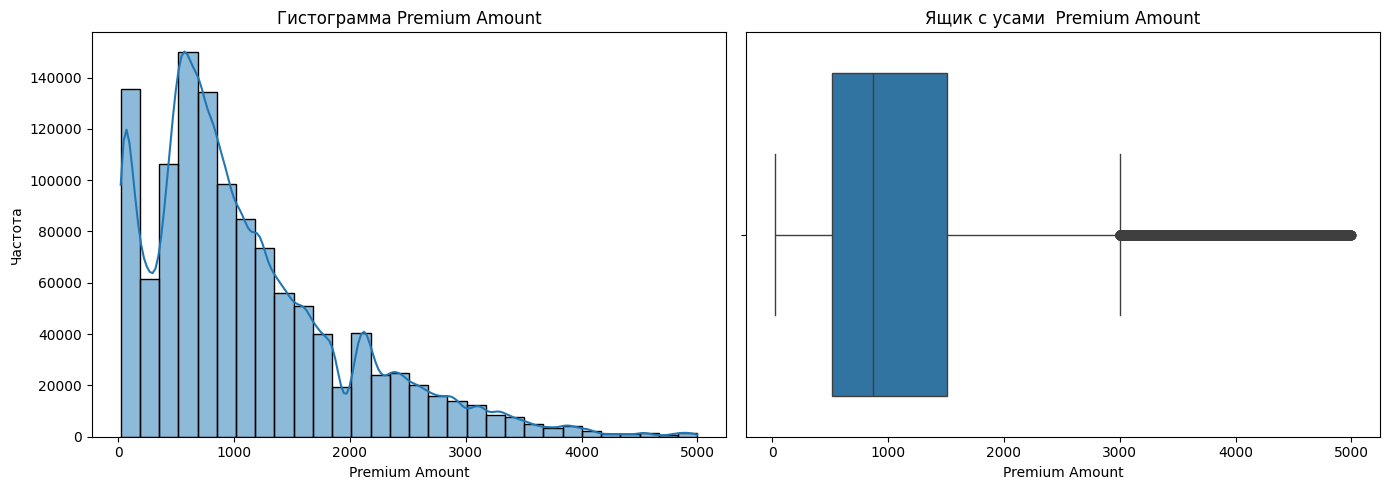

In [278]:
plot_histogram_box(train_data_encoded)

In [279]:
# Находим выбросы в Premium Amount с помощью IQR
Q1 = train_data_encoded["Premium Amount"].quantile(0.35)
Q3 = train_data_encoded["Premium Amount"].quantile(0.65)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаляем выбросы
train_data_new = train_data_encoded[(train_data_encoded["Premium Amount"] >= lower_bound) & 
                                        (train_data_encoded["Premium Amount"] <= upper_bound)]

# Проверяем размер после удаления выбросов
print(f"Количество строк после удаления выбросов: {train_data_new.shape[0]}")


Количество строк после удаления выбросов: 1015992


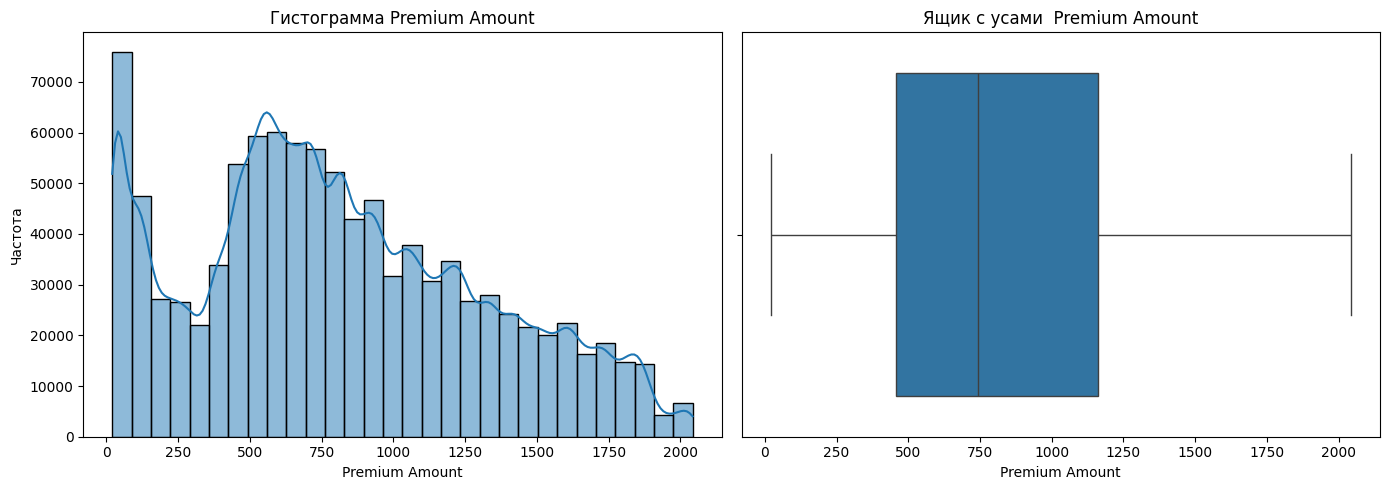

In [280]:
plot_histogram_box(train_data_new)

In [281]:
numeric_columns, categorical_columns = analiz_data(train_data_new)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199998e+06              1.000000     600057.451647  600189.500000  1.200085e+11  119984.100000  1.079990e+06     299905.750000     900085.500000
Age                                  0.0           6.400000e+01             18.000000         41.153658      41.000000  1.804694e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                        0.0           1.499970e+05              2.000000      31645.797875   23911.000000  9.396569e+08    2817.000000  7.553800e+04       9053.000000      43462.000000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.828538       2.000000  2.161179e+00       0.000000  4.000000e+00          0.000000        

In [282]:
train_data_new.shape

(1015992, 22)

In [283]:
# Проверим выбросы в других числовых столбцах с использованием IQR
for col in numeric_columns.columns:
    Q1 = train_data_new[col].quantile(0.25)
    Q3 = train_data_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Удаляем выбросы
    train_data_new_2 = train_data_new[(train_data_new[col] >= lower_bound) & 
                                             (train_data_new[col] <= upper_bound)]
    
    print(f"Обработаны выбросы в столбце {col}.")


Обработаны выбросы в столбце id.
Обработаны выбросы в столбце Age.
Обработаны выбросы в столбце Annual Income.
Обработаны выбросы в столбце Number of Dependents.
Обработаны выбросы в столбце Health Score.
Обработаны выбросы в столбце Previous Claims.
Обработаны выбросы в столбце Vehicle Age.
Обработаны выбросы в столбце Credit Score.
Обработаны выбросы в столбце Insurance Duration.
Обработаны выбросы в столбце Premium Amount.
Обработаны выбросы в столбце Education Level.
Обработаны выбросы в столбце Occupation.
Обработаны выбросы в столбце Location.
Обработаны выбросы в столбце Policy Type.
Обработаны выбросы в столбце Policy Start Date.
Обработаны выбросы в столбце Customer Feedback.
Обработаны выбросы в столбце Exercise Frequency.
Обработаны выбросы в столбце Property Type.


In [284]:
numeric_columns, categorical_columns = analiz_data(train_data_new_2)

Числовые признаки: 

                      Доля пропусков (%)  Максимальное значение  Минимальное значение  Среднее значение        Медиана     Дисперсия   Квантиль 0.1  Квантиль 0.9  Квартиль 1 (25%)  Квартиль 3 (75%)
id                                   0.0           1.199998e+06              1.000000     600057.451647  600189.500000  1.200085e+11  119984.100000  1.079990e+06     299905.750000     900085.500000
Age                                  0.0           6.400000e+01             18.000000         41.153658      41.000000  1.804694e+02      22.000000  6.000000e+01         30.000000         53.000000
Annual Income                        0.0           1.499970e+05              2.000000      31645.797875   23911.000000  9.396569e+08    2817.000000  7.553800e+04       9053.000000      43462.000000
Number of Dependents                 0.0           4.000000e+00              0.000000          1.828538       2.000000  2.161179e+00       0.000000  4.000000e+00          0.000000        

In [285]:
train_data_new_2.shape

(1015992, 22)

In [286]:
numeric_columns

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Exercise Frequency,Property Type
1,1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.00000,2.0,1483.0,2,2,0,1,4,1,1,2
2,2,23.0,25602.0,3.0,47.177549,1.0,14.0,592.92435,3.0,567.0,1,1,1,2,4,2,3,2
3,3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.00000,1.0,765.0,0,2,0,0,5,0,0,0
4,4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.00000,4.0,2022.0,0,1,0,2,2,0,3,2
6,6,41.0,40336.0,0.0,24.578648,2.0,8.0,807.00000,6.0,439.0,3,2,0,0,1,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199994,1199994,34.0,23456.0,4.0,14.783439,1.0,12.0,548.00000,9.0,1584.0,2,1,0,0,4,2,1,0
1199995,1199995,36.0,27316.0,0.0,13.772907,1.0,5.0,372.00000,3.0,1303.0,2,0,2,2,4,0,0,0
1199996,1199996,54.0,35786.0,0.0,11.483482,1.0,10.0,597.00000,4.0,821.0,2,1,0,1,3,0,3,0
1199997,1199997,19.0,51884.0,0.0,14.724469,0.0,19.0,592.92435,6.0,371.0,2,2,1,0,2,2,1,1


In [287]:
categorical_columns

,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes
1,False,False,False,True
2,True,False,False,True
3,True,True,False,True
4,True,False,True,True
6,True,True,False,False
...,...,...,...,...
1199994,True,False,True,False
1199995,False,True,False,False
1199996,True,False,False,False
1199997,True,False,False,False


In [288]:
num_col_del = ['id']
cat_col_del = ['Policy Start Date']
# Вызов функции для отображения графиков
#plot_analize_data(train_data_new_2, num_col_del, cat_col_del)


#### Не все данные сбалансированы

In [289]:
train_data_encoded1 = pd.DataFrame()

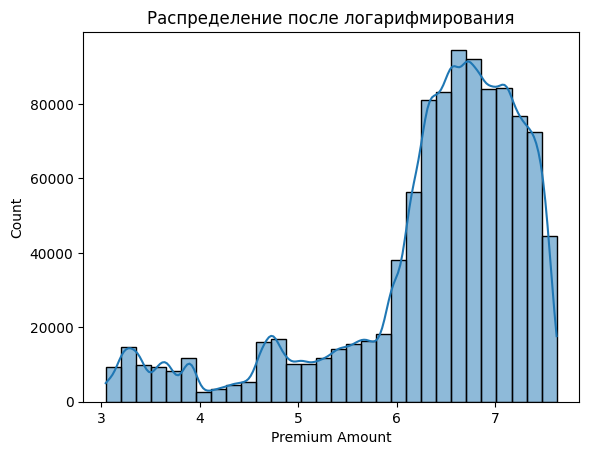

In [290]:
train_data_encoded1["Premium Amount"] = np.log1p(train_data_new_2["Premium Amount"])

# Гистограмма после логарифмического преобразования
sns.histplot(train_data_encoded1["Premium Amount"], bins=30, kde=True)
plt.title("Распределение после логарифмирования")
plt.show()

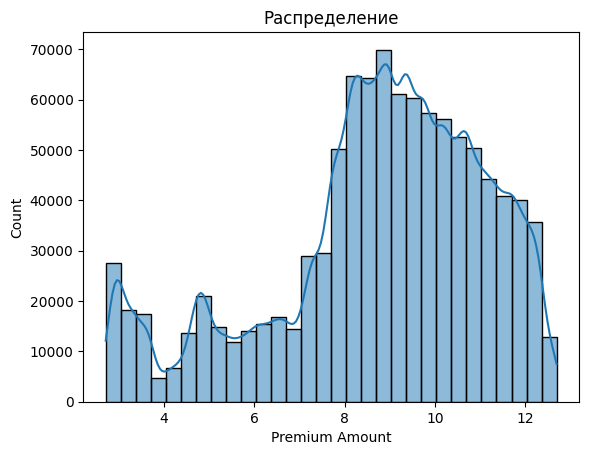

In [291]:
train_data_encoded1["Premium Amount"] = np.cbrt(train_data_new_2["Premium Amount"])

# Гистограмма после логарифмического преобразования
sns.histplot(train_data_encoded1["Premium Amount"], bins=30, kde=True)
plt.title("Распределение")
plt.show()

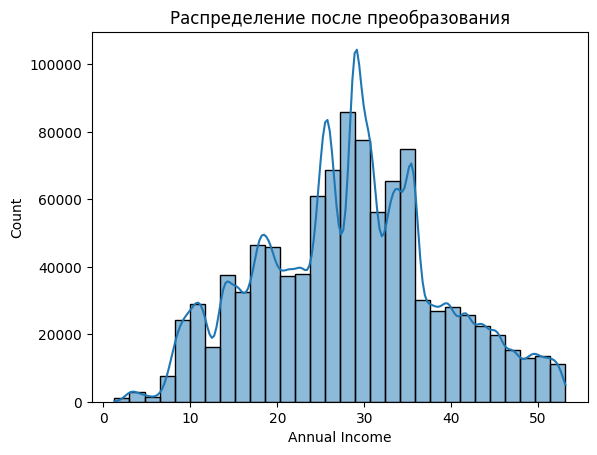

In [292]:
train_data_encoded1["Annual Income"] = np.cbrt(train_data_new_2["Annual Income"])

# Гистограмма после логарифмического преобразования
sns.histplot(train_data_encoded1["Annual Income"], bins=30, kde=True)
plt.title("Распределение после преобразования")
plt.show()

#### используем Cube Root Transform

In [293]:
train_data_new_2["Premium Amount"] = np.cbrt(train_data_new_2["Premium Amount"])
train_data_new_2["Annual Income"] = np.cbrt(train_data_new_2["Annual Income"])

In [294]:

print(train_data_new_2.head().to_string(index=False))

 id  Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type  Policy Start Date  Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
  1 39.0      31.641174                   3.0     15.569731              1.0         12.0     694.00000                 2.0       11.403733                2           2         0            1                  4                  1                   1              2        False                   False                  False                True
  2 23.0      29.473019                   3.0     47.177549              1.0         14.0     592.92435                 3.0        8.276773                1           1         1            2                  4                  2                   3              2         True                   False         

#### Нормализация

In [295]:
# Применяем нормализацию (можно выбрать "standard" или "minmax")
train_data_normalized = normalize_data(train_data_new_2.copy(), method="standard")

# Проверяем результат
print(train_data_normalized.head().to_string(index=False))

       id       Age  Annual Income  Number of Dependents  Health Score  Previous Claims  Vehicle Age  Credit Score  Insurance Duration  Premium Amount  Education Level  Occupation  Location  Policy Type  Policy Start Date  Customer Feedback  Exercise Frequency  Property Type  Gender_Male  Marital Status_Married  Marital Status_Single  Smoking Status_Yes
-1.732154 -0.160315       0.329237              0.796862     -0.843817         0.011976     0.420646      0.719691           -1.163857        1.112355         0.439101    0.847940 -1.222428    -0.003660           0.934203           0.006865           -0.460552       1.222688        False                   False                  False                True
-1.732151 -1.351334       0.119293              0.796862      1.838622         0.011976     0.767019      0.004828           -0.778440       -0.195963        -0.451174   -0.371996  0.003363     1.220756           0.934203           1.275525            1.327448       1.222688         True

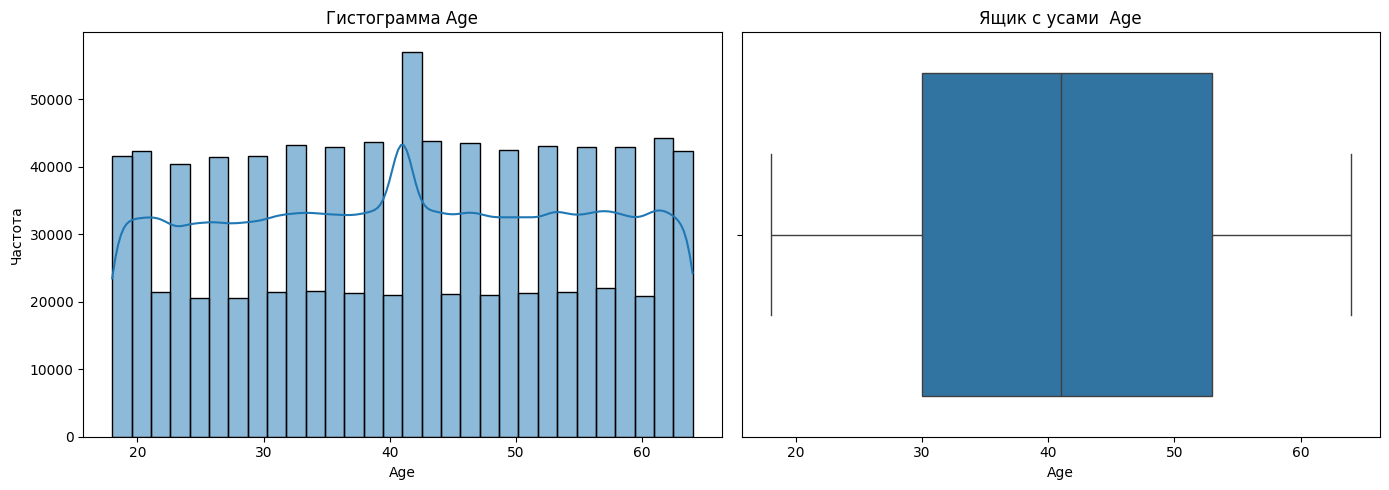

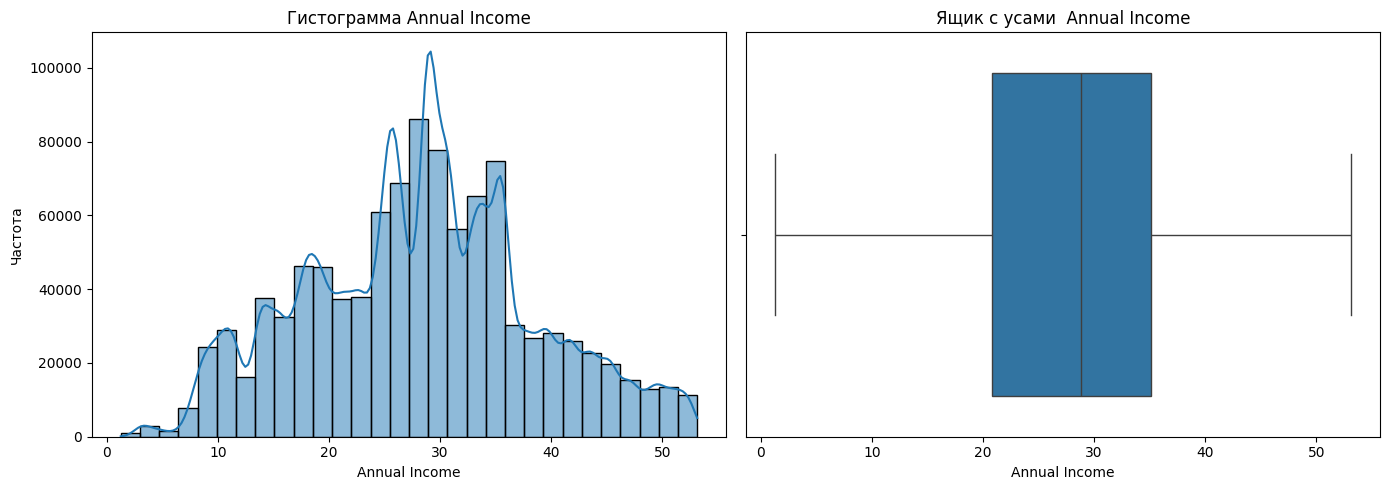

KeyboardInterrupt: 

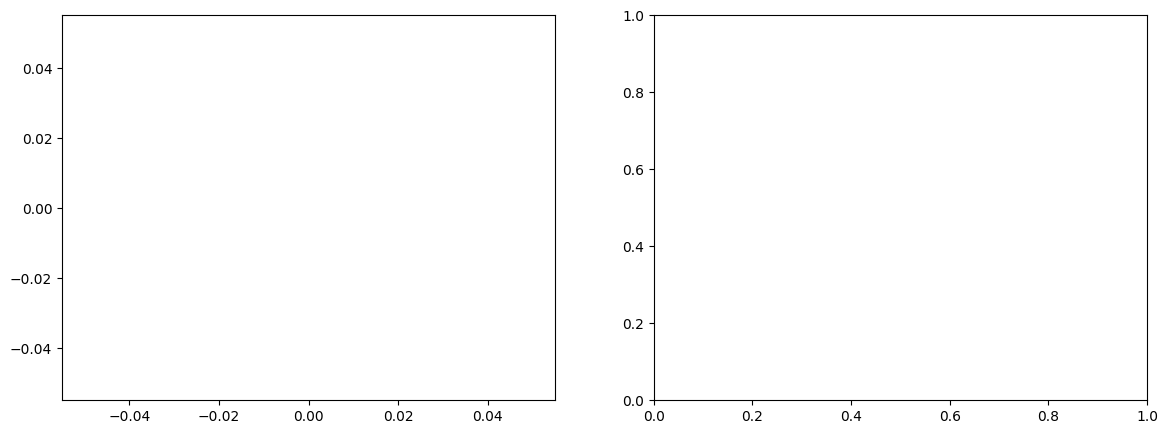

In [296]:
plot_analize_data(train_data_new_2, num_col_del, cat_col_del)

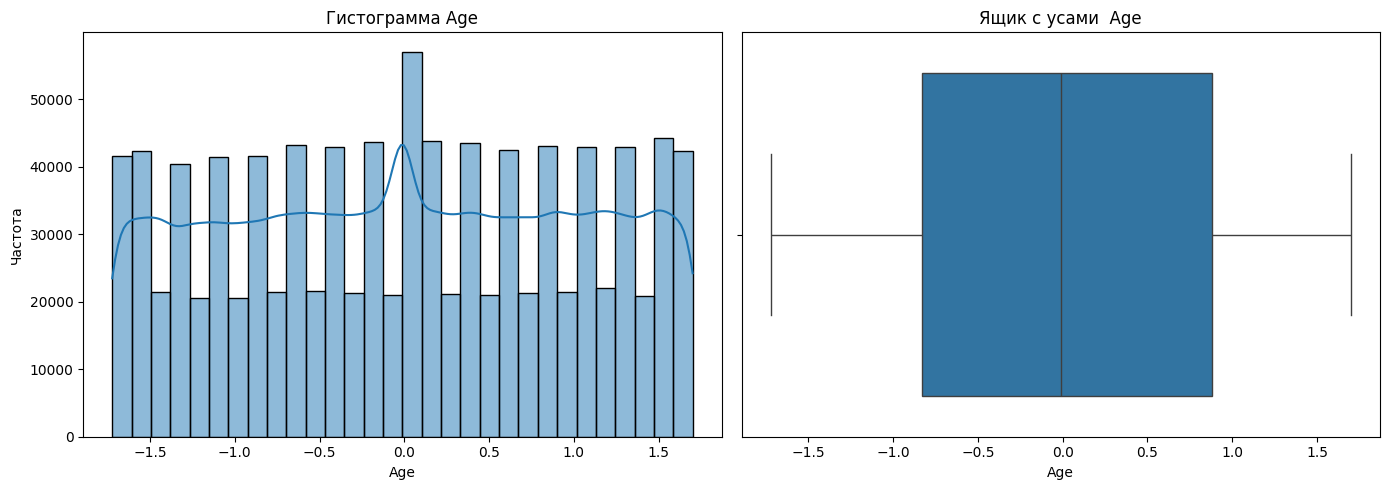

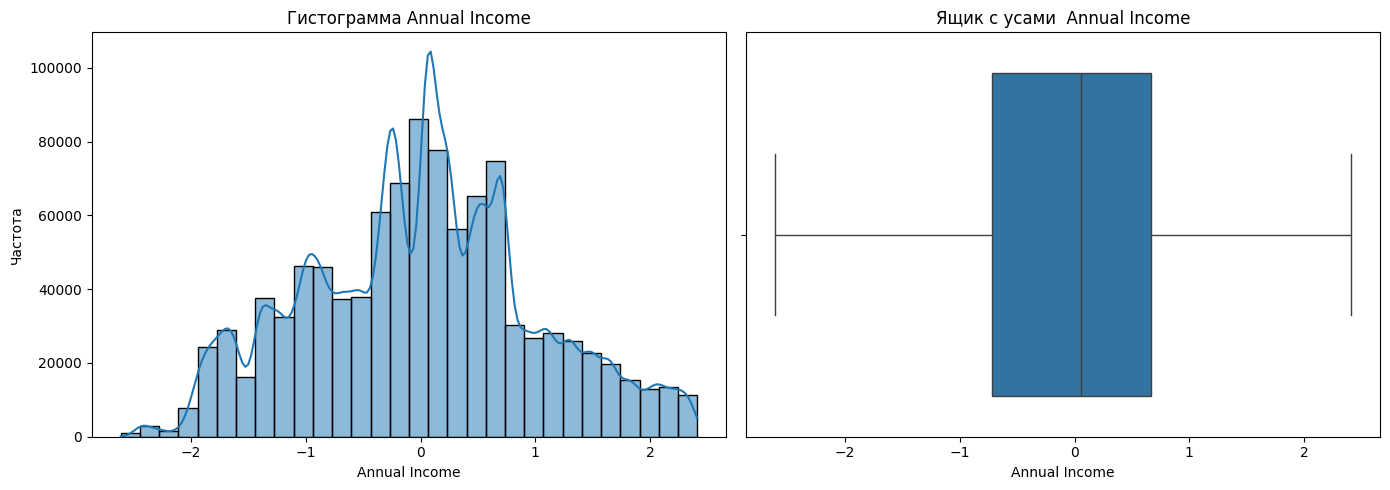

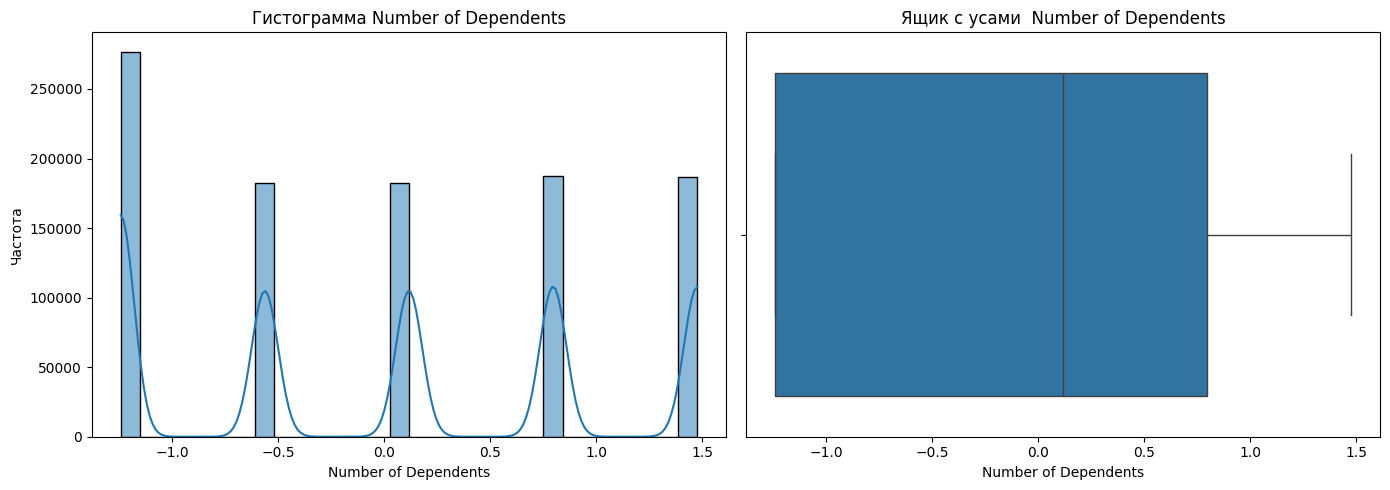

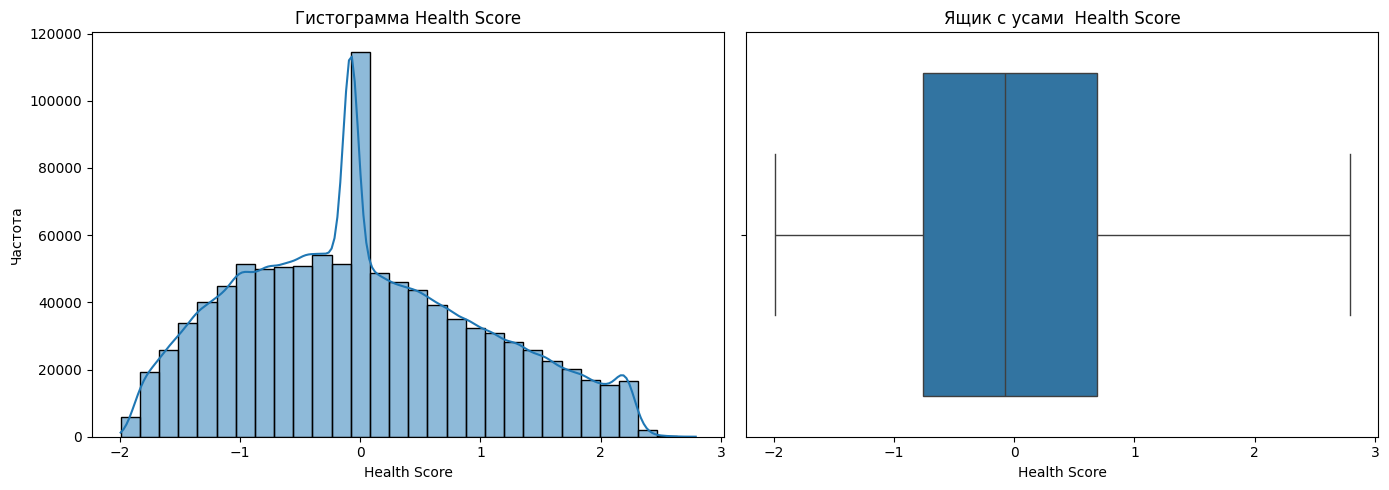

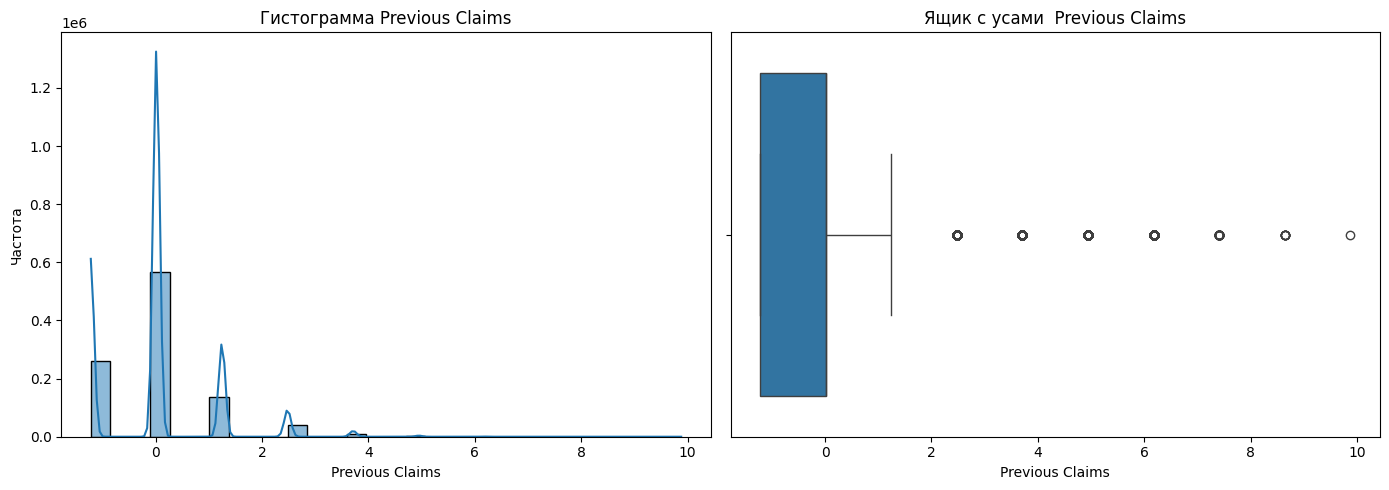

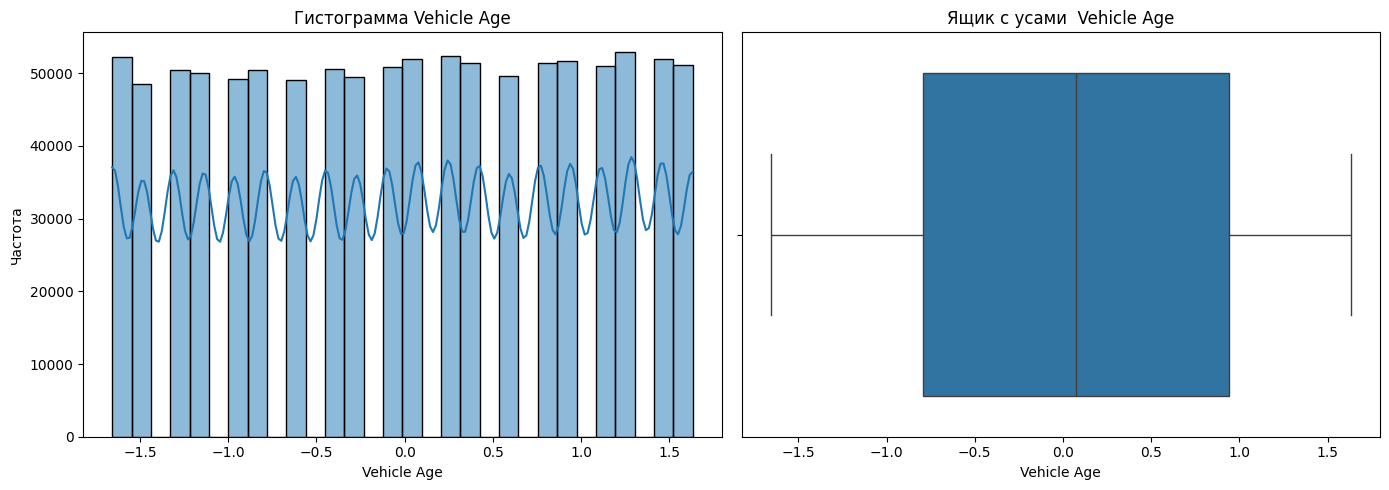

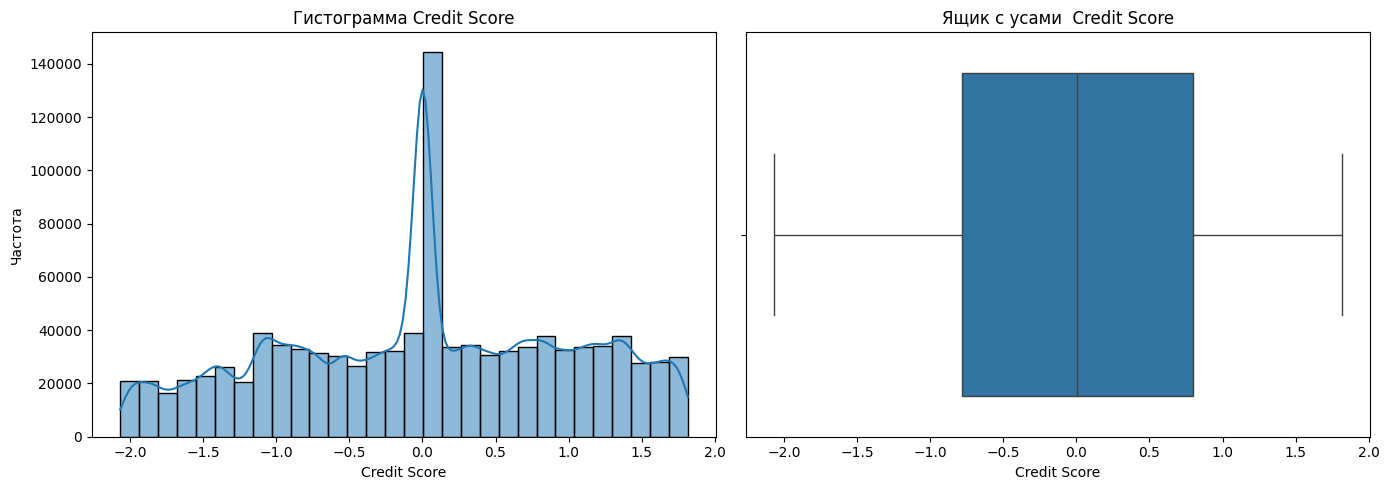

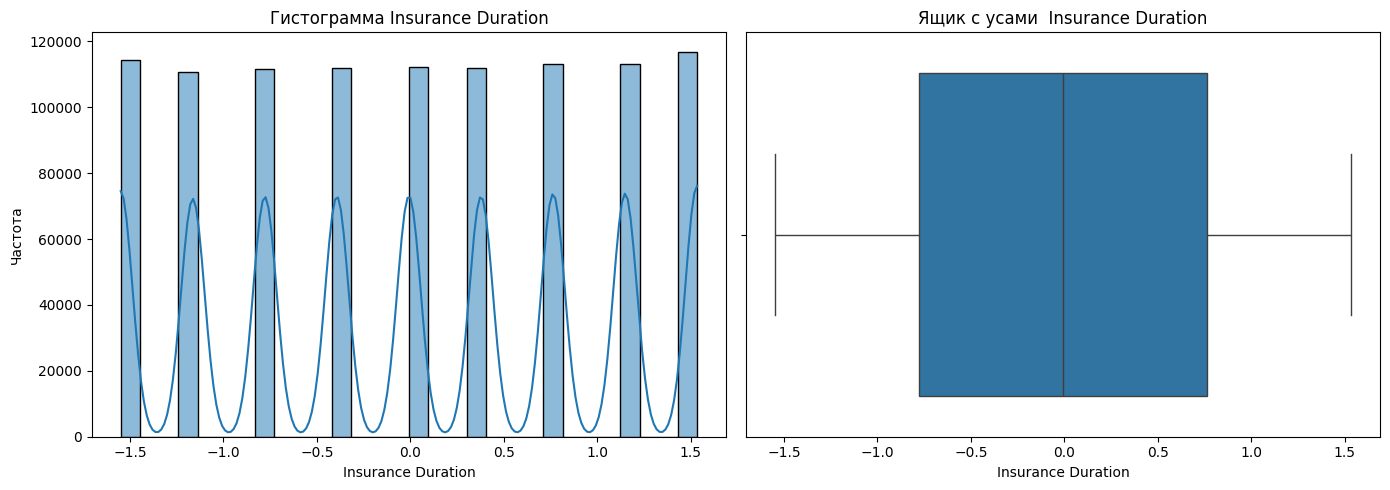

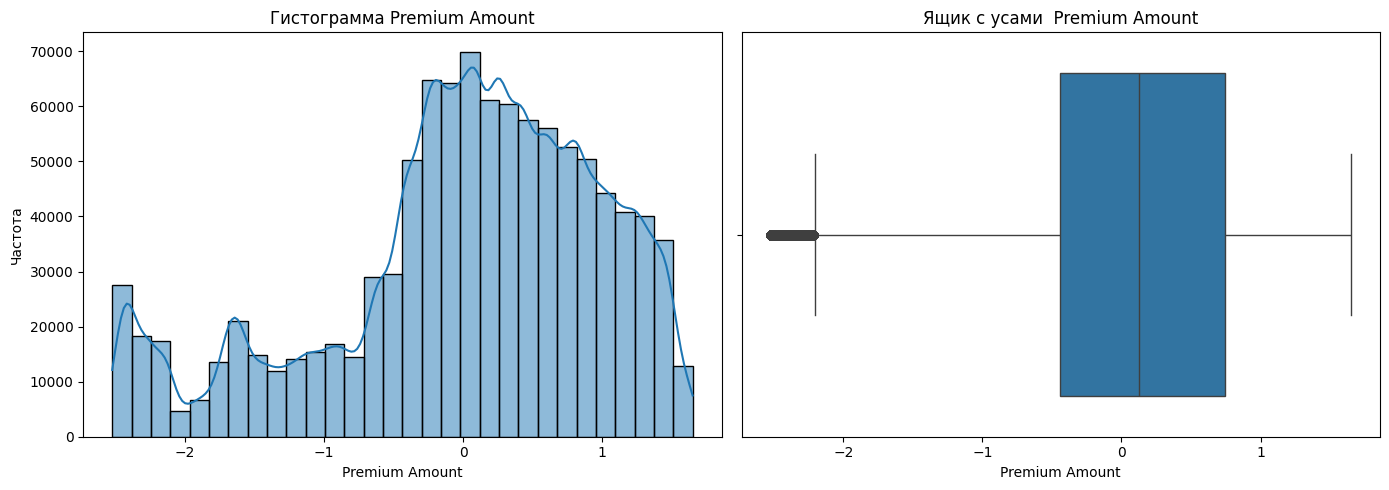

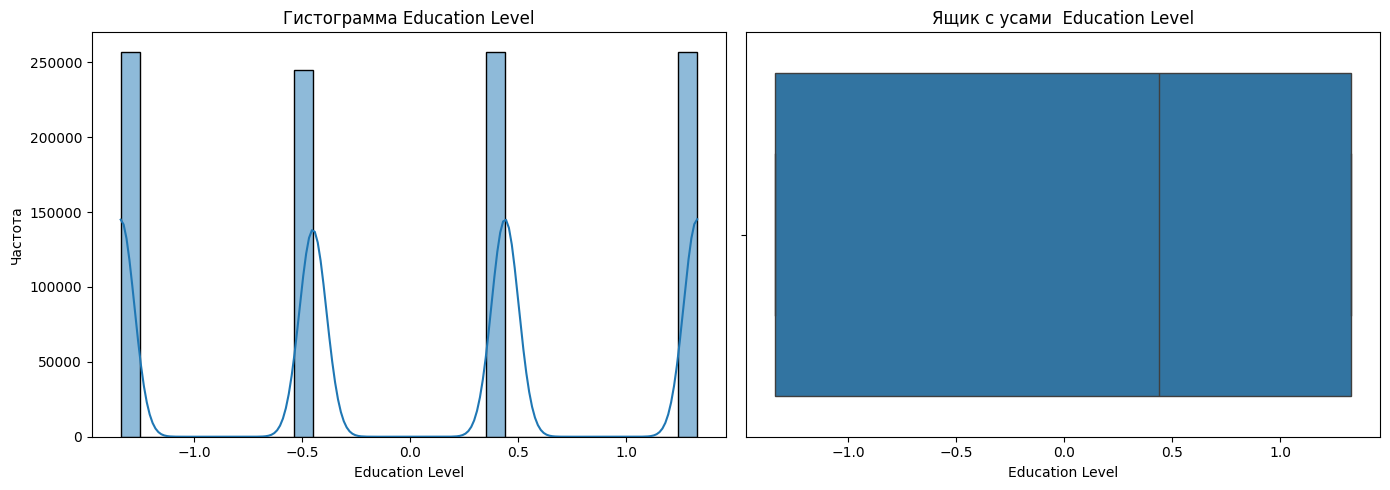

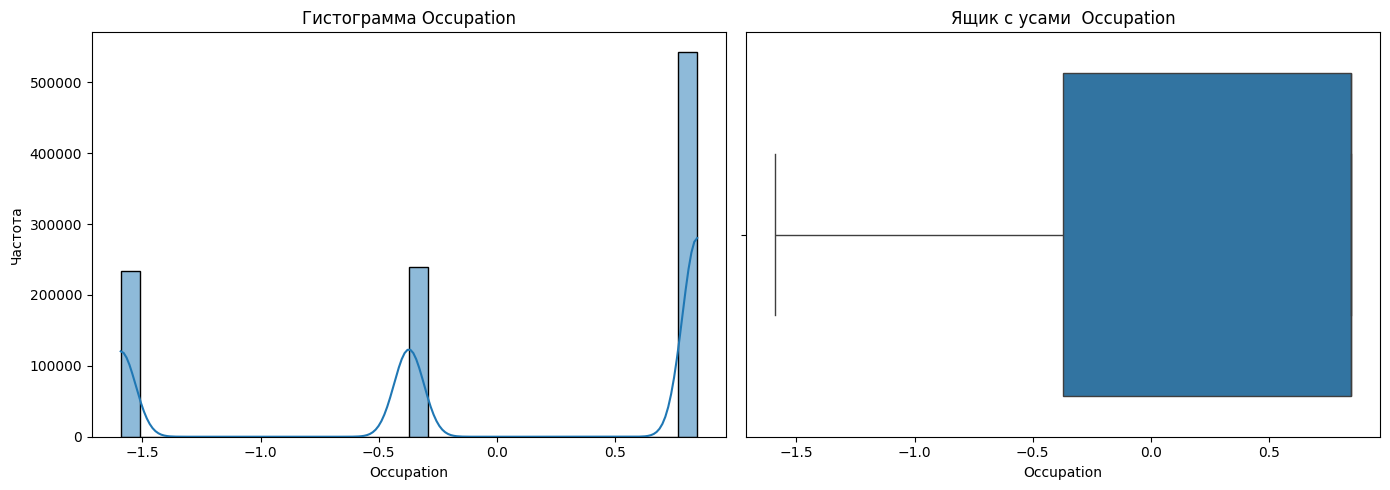

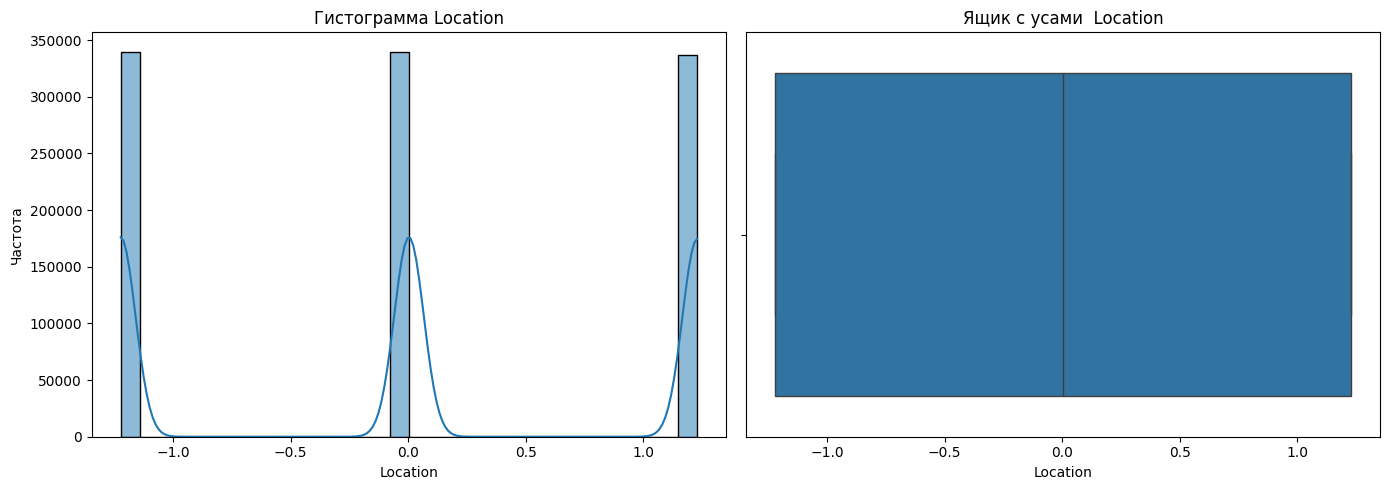

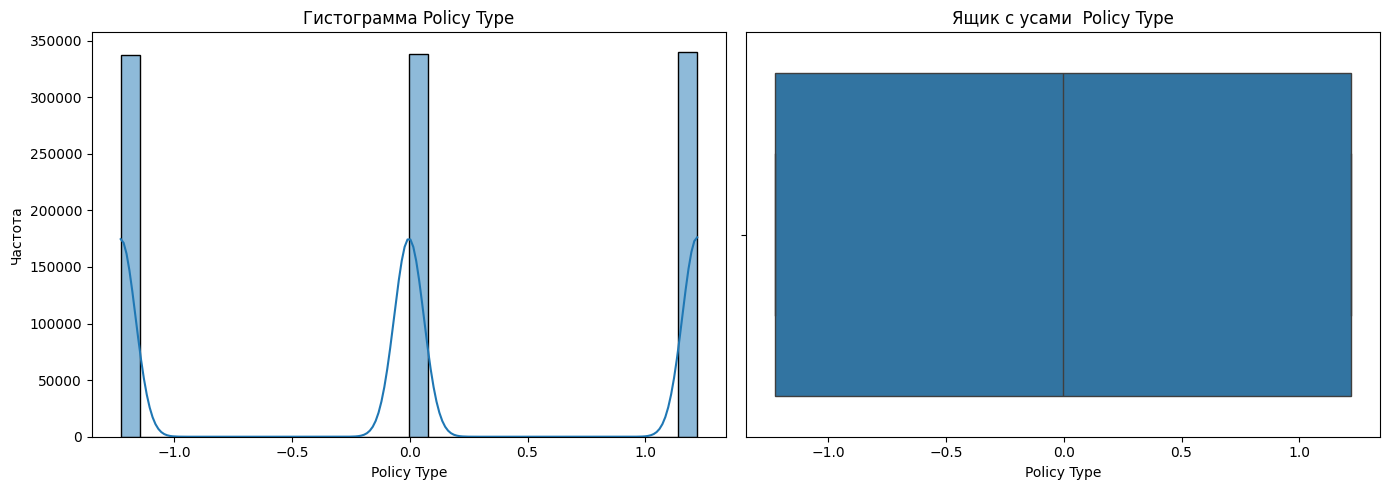

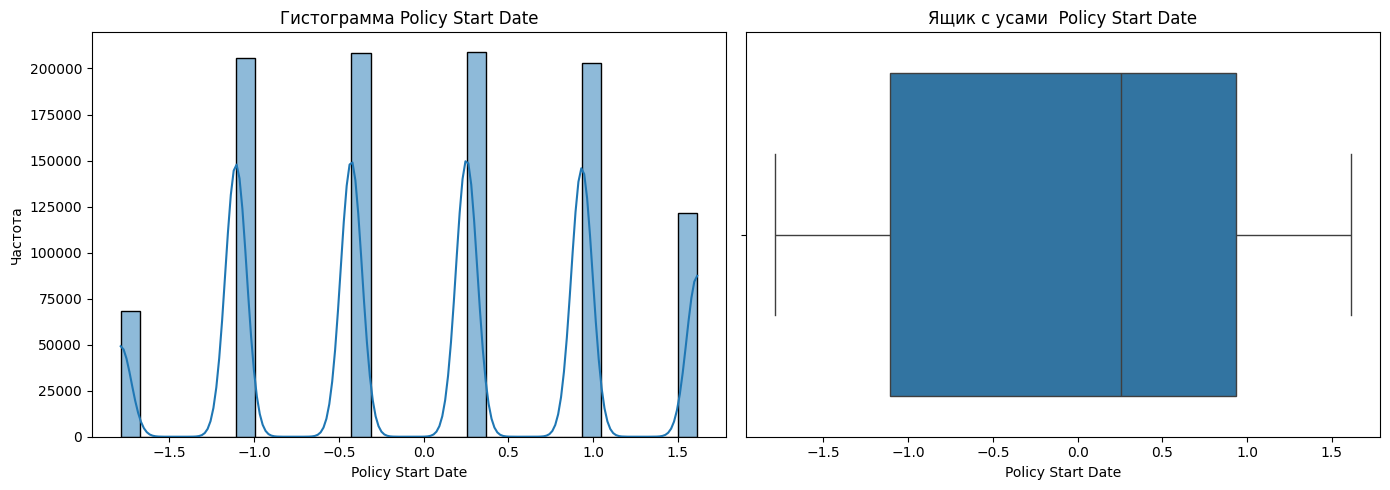

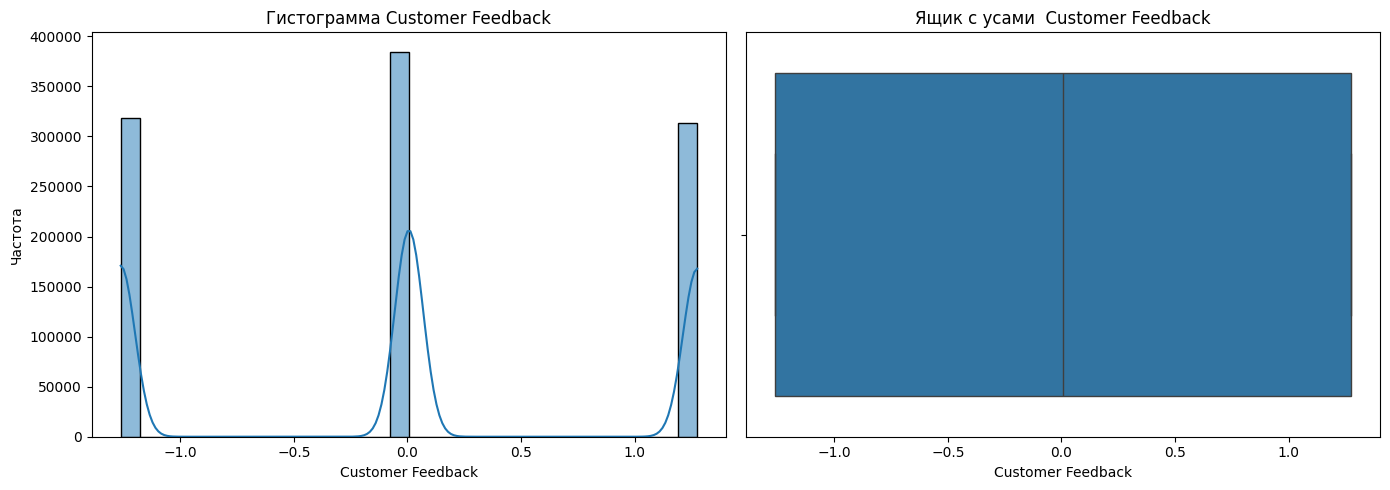

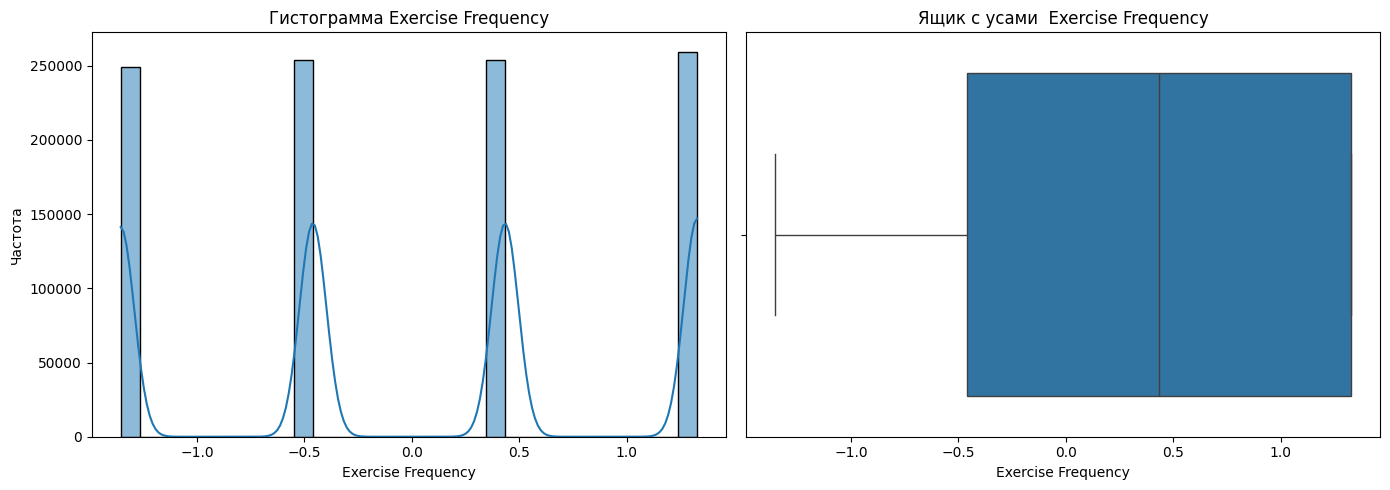

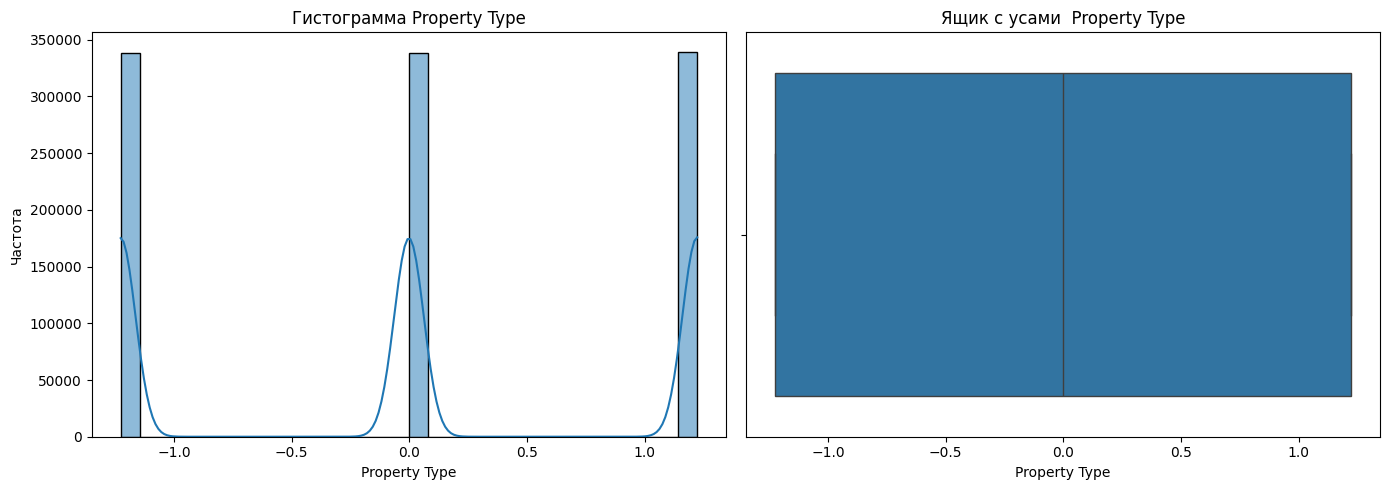

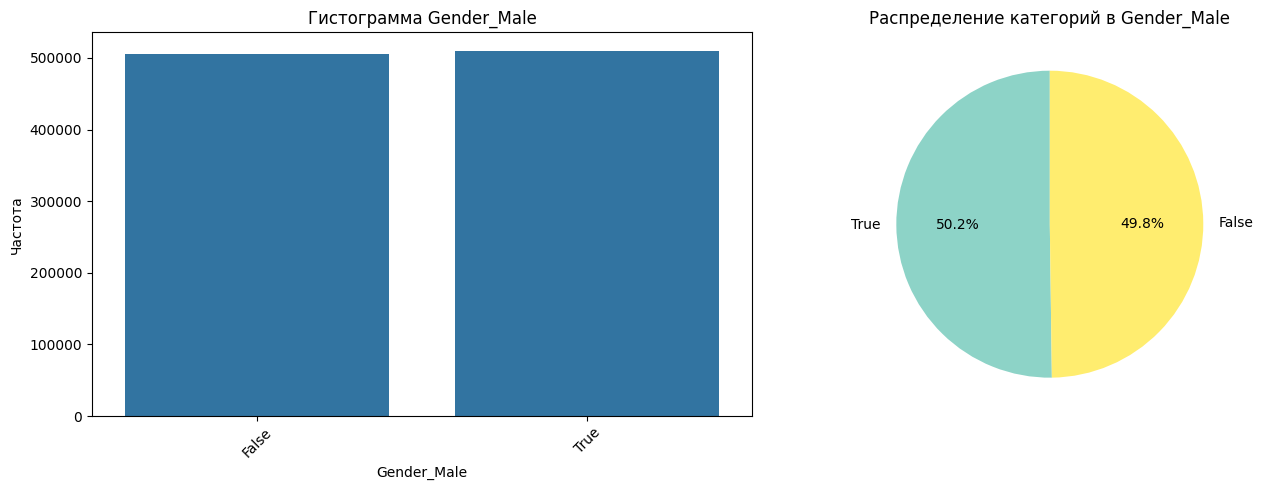

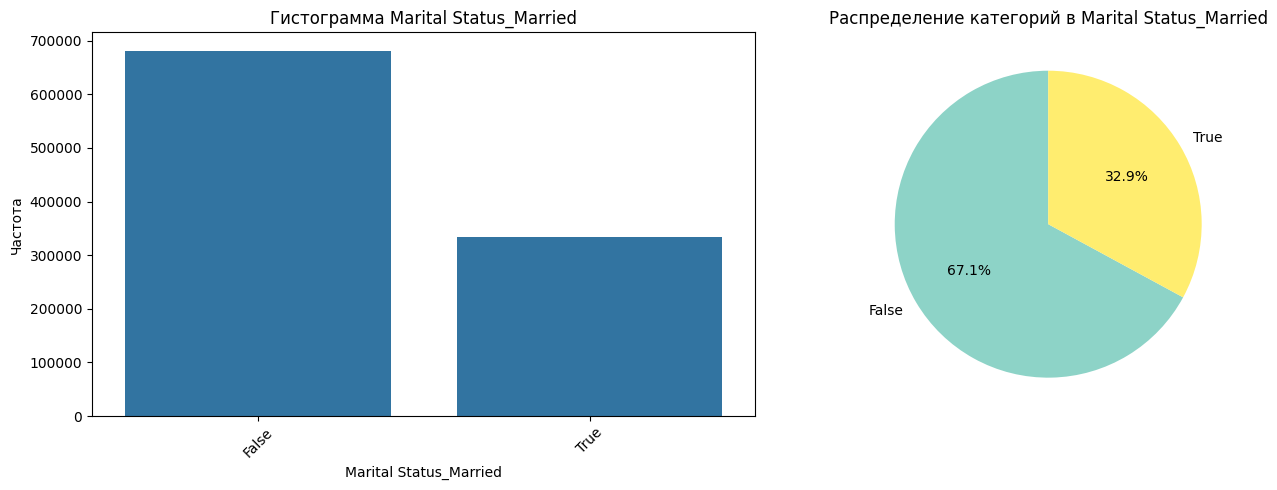

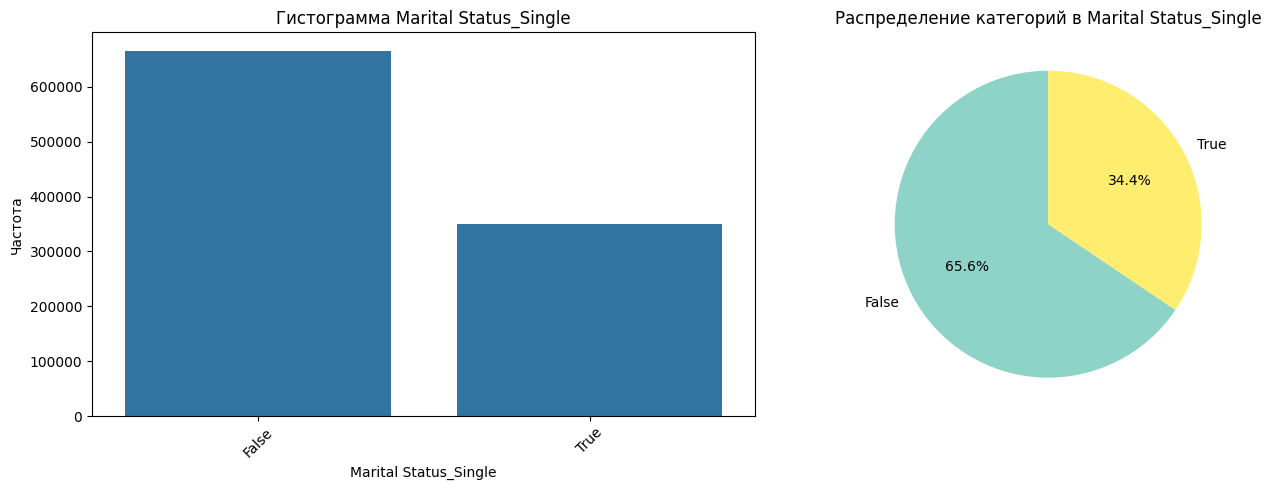

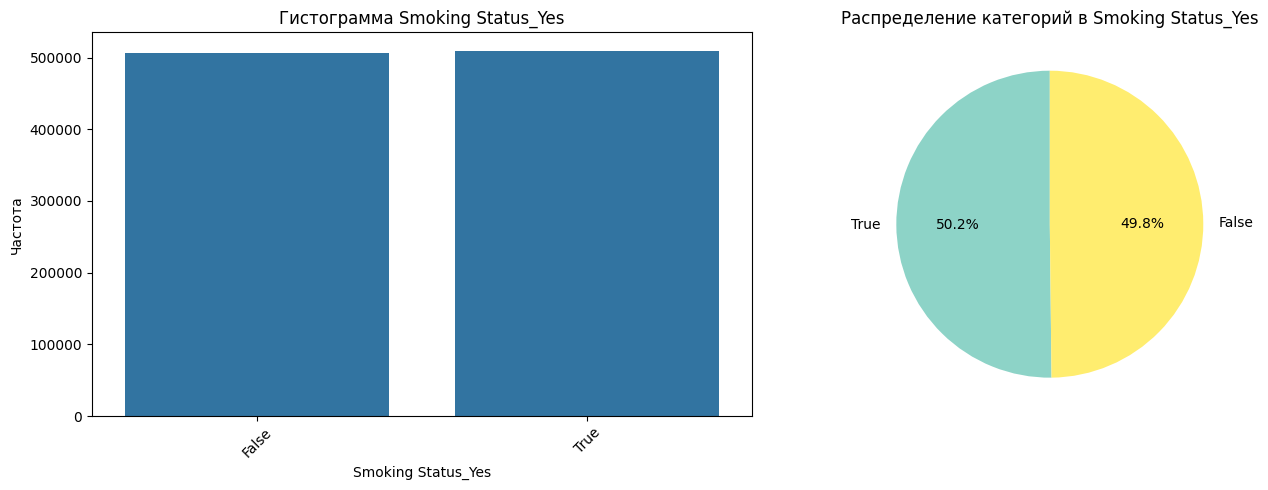

In [ ]:

plot_analize_data(train_data_normalized, num_col_del, cat_col_del)

### Корреляция

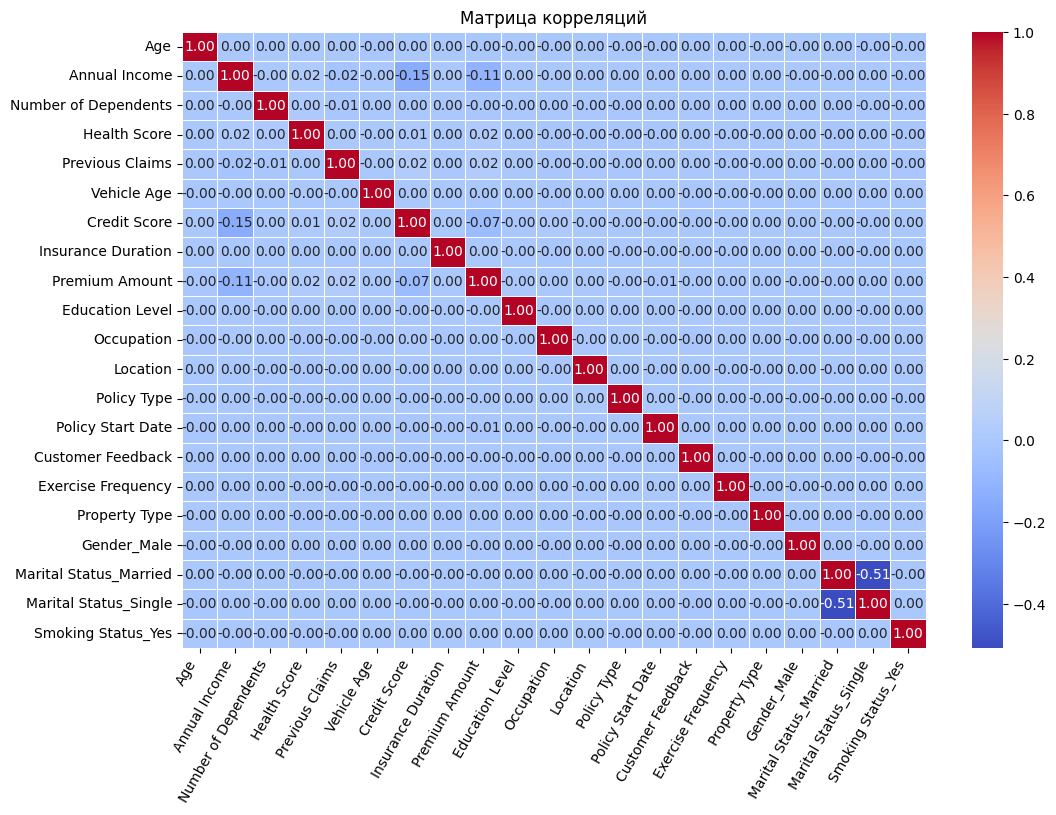

In [ ]:

train_data_new_2 = train_data_new_2.drop(columns=["id"]) 

# Вычисляем корреляцию Пирсона между всеми числовыми переменными
corr_matrix = train_data_new_2.corr()

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций")
plt.xticks(rotation=60, ha='right')  
plt.yticks(rotation=0) 
plt.show()


In [ ]:
# Выбираем корреляцию с целевой переменной
target_corr = corr_matrix["Premium Amount"].sort_values(ascending=False)

# Выводим признаки, которые наиболее связаны с Premium Amount
print(target_corr)


Premium Amount            1.000000
Previous Claims           0.022727
Health Score              0.016862
Marital Status_Single     0.003344
Location                  0.002266
Property Type             0.002176
Smoking Status_Yes        0.001546
Insurance Duration        0.001311
Vehicle Age               0.001202
Occupation                0.000996
Exercise Frequency        0.000188
Education Level          -0.000140
Marital Status_Married   -0.000162
Gender_Male              -0.000464
Customer Feedback        -0.000550
Policy Type              -0.000690
Age                      -0.001644
Number of Dependents     -0.002134
Policy Start Date        -0.006020
Credit Score             -0.069991
Annual Income            -0.112934
Name: Premium Amount, dtype: float64


#### Разделение данных

In [ ]:
# Удаляем целевую переменную из набора признаков
X = train_data_new_2.drop(columns=["Premium Amount"])  # Независимые переменные
y = train_data_new_2["Premium Amount"]  # Целевая переменная


In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_val.shape}")


Размер обучающей выборки: (812793, 20)
Размер тестовой выборки: (203199, 20)


In [ ]:
X_train

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Exercise Frequency,Property Type,Gender_Male,Marital Status_Married,Marital Status_Single,Smoking Status_Yes
920677,42.0,32.482594,3.0,9.527731,1.0,11.0,646.00000,2.0,1,1,2,2,1,1,1,0,True,False,False,True
937443,56.0,29.860463,1.0,15.865696,1.0,18.0,620.00000,9.0,2,2,0,2,2,1,3,0,False,False,True,True
1005465,23.0,35.804756,2.0,20.722275,0.0,16.0,592.92435,2.0,2,2,1,2,3,2,1,2,True,False,False,False
123567,25.0,26.303639,2.0,36.597931,0.0,12.0,594.00000,6.0,0,2,2,2,3,2,3,0,False,False,False,False
504452,45.0,34.476004,3.0,42.651607,2.0,12.0,753.00000,5.0,2,2,1,1,1,1,3,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306029,64.0,42.500254,1.0,41.485557,1.0,17.0,849.00000,8.0,3,2,1,2,3,0,3,0,False,False,True,False
432303,39.0,45.919519,4.0,37.837300,1.0,5.0,575.00000,8.0,1,1,2,0,1,2,0,0,False,True,False,True
155837,44.0,24.754395,0.0,9.392391,1.0,10.0,819.00000,4.0,1,2,1,2,3,0,2,1,True,False,True,True
792696,29.0,30.592303,4.0,23.181232,0.0,8.0,592.92435,1.0,2,0,1,0,2,2,2,0,True,False,False,True


## 4) Обучение

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Инициализируем модель
lin_reg = LinearRegression()

# Обучаем модель на обучающей выборке
lin_reg.fit(X_train, y_train)

# Делаем предсказания
y_pred_lin = lin_reg.predict(X_val)

# Оцениваем качество модели
mae_lin = mean_absolute_error(y_val, y_pred_lin)
mse_lin = mean_squared_error(y_val, y_pred_lin)
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = mse_lin ** 0.5 
r2_lin = r2_score(y_val, y_pred_lin)

print(f"Линейная регрессия:")
print(f"MAE: {mae_lin:.4f}")
print(f"MSE: {mse_lin:.4f}")
print(f"RMSE: {rmse_lin:.4f}")
print(f"R²: {r2_lin:.4f}")


Линейная регрессия:
MAE: 1.8444
MSE: 5.6095
RMSE: 2.3684
R²: 0.0220


#### Вывод  
Очень слабая корреляция признаков с целевой переменной (Premium Amount)  
Большинство признаков имели корреляцию ≈ 0.00–0.02, что значит, что они не объясняют Premium Amount  

Нелинейные зависимости

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degree = 2 # Степень полинома

# Выбираем признаки с корреляцией > 0.01 или < -0.01
selected_features = target_corr[abs(target_corr) > 0.01].index.tolist()
selected_features.remove("Premium Amount")  # Исключаем целевую переменную

# Формируем X и y
X2 = train_data_new_2[selected_features]
y2 = train_data_new_2["Premium Amount"]

print(f"Выбранные признаки: {selected_features}")

# Разделяем данные на обучающую и тестовую выборки (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Обучаем модель
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred_poly = poly_reg.predict(X_test_poly)

# Оцениваем качество модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5  # Берем квадратный корень
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")


Выбранные признаки: ['Previous Claims', 'Health Score', 'Credit Score', 'Annual Income']
Размер X после полиномиального преобразования: (812793, 14)

Полиномиальная регрессия (степень 2):
MAE: 1.8033
MSE: 5.4344
RMSE: 2.3312
R²: 0.0526


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degree = 5 # Степень полинома

# Выбираем признаки с корреляцией > 0.01 или < -0.01
selected_features = target_corr[abs(target_corr) > 0.01].index.tolist()
selected_features.remove("Premium Amount")  # Исключаем целевую переменную

# Формируем X и y
X2 = train_data_new_2[selected_features]
y2 = train_data_new_2["Premium Amount"]

print(f"Выбранные признаки: {selected_features}")

# Разделяем данные на обучающую и тестовую выборки (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Обучаем модель
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred_poly = poly_reg.predict(X_test_poly)

# Оцениваем качество модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5  # Берем квадратный корень
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")


Выбранные признаки: ['Previous Claims', 'Health Score', 'Credit Score', 'Annual Income']
Размер X после полиномиального преобразования: (812793, 125)

Полиномиальная регрессия (степень 5):
MAE: 1.7744
MSE: 5.2993
RMSE: 2.3020
R²: 0.0761


In [309]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

degree = 4 # Степень полинома

# Выбираем признаки с корреляцией > 0.01 или < -0.01
selected_features = target_corr[abs(target_corr) > 0.002].index.tolist()
selected_features.remove("Premium Amount")  # Исключаем целевую переменную

# Формируем X и y
X2 = train_data_new_2[selected_features]
y2 = train_data_new_2["Premium Amount"]

print(f"Выбранные признаки: {selected_features}")

# Разделяем данные на обучающую и тестовую выборки (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

# Обучаем модель
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred_poly = poly_reg.predict(X_test_poly)

# Оцениваем качество модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5  # Берем квадратный корень
r2_poly = r2_score(y_test, y_pred_poly)
rmsle_poly = root_mean_squared_log_error(y_test, y_pred_poly)



print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"RMSLE: {rmsle_poly:.4f}")
print(f"R²: {r2_poly:.4f}")


Выбранные признаки: ['Previous Claims', 'Health Score', 'Marital Status_Single', 'Location', 'Property Type', 'Number of Dependents', 'Policy Start Date', 'Credit Score', 'Annual Income']
Размер X после полиномиального преобразования: (812793, 714)

Полиномиальная регрессия (степень 4):
MAE: 1.7773
MSE: 5.3136
RMSE: 2.3051
RMSLE: 0.2884
R²: 0.0736


In [310]:
selected_features = ['Previous Claims', 'Health Score', 'Marital Status_Single', 'Location', 'Property Type', 'Number of Dependents', 'Policy Start Date', 'Credit Score', 'Annual Income']

In [312]:
test_data

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [ ]:
X_test_kaggle = test_data[selected_features]
X_test_kaggle_poly = poly.transform(X_test_kaggle)  # Применяем полиномиальное преобразование
y_pred_kaggle = poly_reg.predict(X_test_kaggle_poly)

# Загружаем образец файла
sample_submission = pd.read_csv("sample_submission.csv")

# Заполняем предсказаниями
sample_submission["Premium Amount"] = y_pred_kaggle  # Заменяем колонку предсказаниями

# Сохраняем в CSV для загрузки на Kaggle
sample_submission.to_csv("submission.csv", index=False)

print("✅ Файл submission.csv готов для загрузки на Kaggle!")


KeyError: "['Marital Status_Single'] not in index"

## 5) Оценка  
Лучшее качество у модели:    
Полиномиальная регрессия (степень 4):   
MAE: 1.7773  
MSE: 5.3136  
RMSE: 2.3051  
R²: 0.0736    

## 6) Кросс-валидация

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

degree = 2  # Степень полинома
k_folds = 5  # Количество фолдов для кросс-валидации

# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X2)

# Инициализируем модель линейной регрессии
poly_reg = LinearRegression()

# Создаем стратегию разбиения на фолды
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Применяем кросс-валидацию (метрика - R²)
cv_r2_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='r2')
cv_mae_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='neg_mean_absolute_error')

# Вычисляем средние значения метрик
mean_r2 = np.mean(cv_r2_scores)
mean_mae = -np.mean(cv_mae_scores)  # Меняем знак, так как sklearn возвращает отрицательный MAE

print(f"\nКросс-валидация ({k_folds}-fold) для полиномиальной регрессии (степень {degree}):")
print(f"Средний R²: {mean_r2:.4f}")
print(f"Средний MAE: {mean_mae:.4f}")



Кросс-валидация (5-fold) для полиномиальной регрессии (степень 2):
Средний R²: 0.0523
Средний MAE: 1.8018


In [ ]:
k_folds = 5  # Количество фолдов для кросс-валидации
degree = 3


# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X2)

# Инициализируем модель линейной регрессии
poly_reg = LinearRegression()

# Создаем стратегию разбиения на фолды
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Применяем кросс-валидацию (метрика - R²)
cv_r2_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='r2')
cv_mae_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='neg_mean_absolute_error')

# Вычисляем средние значения метрик
mean_r2 = np.mean(cv_r2_scores)
mean_mae = -np.mean(cv_mae_scores)  # Меняем знак, так как sklearn возвращает отрицательный MAE

print(f"\nКросс-валидация ({k_folds}-fold) для полиномиальной регрессии (степень {degree}):")
print(f"Средний R²: {mean_r2:.4f}")
print(f"Средний MAE: {mean_mae:.4f}")


Кросс-валидация (5-fold) для полиномиальной регрессии (степень 3):
Средний R²: 0.0655
Средний MAE: 1.7845


In [ ]:
k_folds = 5  # Количество фолдов для кросс-валидации
degree = 4


# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly.fit_transform(X2)

# Инициализируем модель линейной регрессии
poly_reg = LinearRegression()

# Создаем стратегию разбиения на фолды
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Применяем кросс-валидацию (метрика - R²)
cv_r2_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='r2')
cv_mae_scores = cross_val_score(poly_reg, X_poly, y2, cv=kf, scoring='neg_mean_absolute_error')

# Вычисляем средние значения метрик
mean_r2 = np.mean(cv_r2_scores)
mean_mae = -np.mean(cv_mae_scores)  # Меняем знак, так как sklearn возвращает отрицательный MAE

print(f"\nКросс-валидация ({k_folds}-fold) для полиномиальной регрессии (степень {degree}):")
print(f"Средний R²: {mean_r2:.4f}")
print(f"Средний MAE: {mean_mae:.4f}")


Кросс-валидация (5-fold) для полиномиальной регрессии (степень 4):
Средний R²: 0.0728
Средний MAE: 1.7755


#### Улучшения модели

In [ ]:
for d in range(1, 5):  # Перебираем степени полинома
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X2)

    scores = cross_val_score(LinearRegression(), X_poly, y2, cv=5, scoring='r2')
    print(f"Степень {d}: Средний R² = {np.mean(scores):.4f}")


Степень 1: Средний R² = 0.0213
Степень 2: Средний R² = 0.0522
Степень 3: Средний R² = 0.0656
Степень 4: Средний R² = 0.0728


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

degree = 4 # Степень полинома

# Отбираем топ  лучших признаков
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X2, y2)

# Выводим выбранные признаки
selected_feature_names = X2.columns[selector.get_support()]
print(f"Выбранные признаки: {list(selected_feature_names)}")

#  Разделяем на train/test (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y2, test_size=0.2, random_state=42)

# 3Нормализация (улучшает стабильность полиномиальных признаков)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Размер X после полиномиального преобразования: {X_train_poly.shape}")

#  Обучаем модель
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

#  Делаем предсказания
y_pred_poly = poly_reg.predict(X_test_poly)

# Оцениваем качество модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly ** 0.5  # Берем квадратный корень
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nПолиномиальная регрессия (степень {degree}):")
print(f"MAE: {mae_poly:.4f}")
print(f"MSE: {mse_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")



/home/maksim/develops/python/MAKSIM/.venv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Выбранные признаки: ['Previous Claims', 'Health Score', 'Marital Status_Single', 'Location', 'Property Type', 'Number of Dependents', 'Policy Start Date', 'Credit Score', 'Annual Income']
Размер X после полиномиального преобразования: (812793, 714)

Полиномиальная регрессия (степень 4):
MAE: 1.7713
MSE: 5.2860
RMSE: 2.2991
R²: 0.0784


In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)  # alpha регулирует силу регуляризации
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Ridge: {r2_ridge:.4f}")


R² Ridge: 0.0784


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Random Forest: {r2_rf:.4f}")


R² Random Forest: 0.0736


## Модель Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

from torch.utils.data import Dataset, DataLoader


In [ ]:
X2

,Previous Claims,Health Score,Marital Status_Single,Location,Property Type,Number of Dependents,Policy Start Date,Credit Score,Annual Income
1,1.0,15.569731,False,0,2,3.0,4,694.00000,31.641174
2,1.0,47.177549,False,1,2,3.0,4,592.92435,29.473019
3,1.0,10.938144,False,0,0,2.0,5,367.00000,52.153271
4,0.0,20.376094,True,0,2,1.0,2,598.00000,34.099765
6,2.0,24.578648,False,0,2,0.0,1,807.00000,34.295011
...,...,...,...,...,...,...,...,...,...
1199994,1.0,14.783439,True,0,0,4.0,4,548.00000,28.625384
1199995,1.0,13.772907,False,2,0,0.0,4,372.00000,30.116583
1199996,1.0,11.483482,False,0,0,0.0,3,597.00000,32.953715
1199997,0.0,14.724469,False,1,1,0.0,2,592.92435,37.297336


In [305]:
X2 = X2.astype(float)  # Преобразуем все данные в float

X_np = X2.to_numpy()  # Преобразуем DataFrame в numpy
y_np = y2.to_numpy().reshape(-1, 1)  # Приводим y к нужной форме

#  Добавляем полиномиальные признаки (без sklearn)
degree = 2
X_poly_np = np.hstack([X_np] + [X_np**d for d in range(2, degree+1)])  # Создаём полиномы

#  Преобразуем данные в PyTorch тензоры
X_tensor = torch.tensor(X_poly_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32)

#  Определяем модель линейной регрессии
class PolynomialRegression(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Линейный слой

    def forward(self, x):
        return self.linear(x)





model_path_full = "polynomial_model_full.pth"

# Путь к файлу с весами модели
model_path = "polynomial_regression_weights.pth"

input_dim = X_tensor.shape[1]  # Количество признаков после полиномиального преобразования
# Проверяем, существует ли файл
if os.path.exists(model_path):
    # Загружаем веса модели
    model = PolynomialRegression(input_dim)
    model.load_state_dict(torch.load(model_path))
    model.train()  # Переводим в режим обучения
    print(" Модель загружена! Продолжаем обучение...")
else:
    print("⚠️ Файл модели не найден. Обучение будет начато с нуля.")
    model = PolynomialRegression(input_dim)


# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.00001)  

# Обучаем модель
num_epochs = 5000  
for epoch in range(num_epochs):
    optimizer.zero_grad()  
    y_pred = model(X_tensor)  
    loss = criterion(y_pred, y_tensor)  
    loss.backward()  
    optimizer.step()  

    if (epoch + 1) % 100 == 0:  
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Делаем предсказания
y_pred_tensor = model(X_tensor).detach().numpy()

# Вычисляем метрики
mae = np.mean(np.abs(y_np - y_pred_tensor))
mse = np.mean((y_np - y_pred_tensor) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_np - y_pred_tensor) ** 2) / np.sum((y_np - np.mean(y_np)) ** 2)


# Сохранение всей модели
torch.save(model, model_path_full)
print("Полная модель сохранена!")


# Сохранение только весов модели
torch.save(model.state_dict(), "polynomial_regression_weights.pth")
print("Модель сохранена (только веса)!")



print("\nПолиномиальная регрессия на PyTorch:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


 Модель загружена! Продолжаем обучение...
Epoch [100/5000], Loss: 7.2813
Epoch [200/5000], Loss: 7.2800
Epoch [300/5000], Loss: 7.2787
Epoch [400/5000], Loss: 7.2772
Epoch [500/5000], Loss: 7.2755
Epoch [600/5000], Loss: 7.2736
Epoch [700/5000], Loss: 7.2714
Epoch [800/5000], Loss: 7.2691
Epoch [900/5000], Loss: 7.2665
Epoch [1000/5000], Loss: 7.2638
Epoch [1100/5000], Loss: 7.2609
Epoch [1200/5000], Loss: 7.2578
Epoch [1300/5000], Loss: 7.2546
Epoch [1400/5000], Loss: 7.2511
Epoch [1500/5000], Loss: 7.2475
Epoch [1600/5000], Loss: 7.2437
Epoch [1700/5000], Loss: 7.2398
Epoch [1800/5000], Loss: 7.2357
Epoch [1900/5000], Loss: 7.2314
Epoch [2000/5000], Loss: 7.2270
Epoch [2100/5000], Loss: 7.2235
Epoch [2200/5000], Loss: 7.2187
Epoch [2300/5000], Loss: 7.2144
Epoch [2400/5000], Loss: 7.2300
Epoch [2500/5000], Loss: 7.2060
Epoch [2600/5000], Loss: 7.2017
Epoch [2700/5000], Loss: 7.2009
Epoch [2800/5000], Loss: 7.1933
Epoch [2900/5000], Loss: 7.1891
Epoch [3000/5000], Loss: 7.1852
Epoch [

In [ ]:

X2 = X2.astype(float)  # Преобразуем все данные в float

X_np = X2.to_numpy()  # Преобразуем DataFrame в numpy
y_np = y2.to_numpy().reshape(-1, 1)  # Приводим y к нужной форме

#  Добавляем полиномиальные признаки (без sklearn)
degree = 2
X_poly_np = np.hstack([X_np] + [X_np**d for d in range(2, degree+1)])  # Создаём полиномы

#  Преобразуем данные в PyTorch тензоры
X_tensor = torch.tensor(X_poly_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32)

#  Определяем модель линейной регрессии
class PolynomialRegression(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Линейный слой

    def forward(self, x):
        return self.linear(x)





model_path_full = "polynomial_model_full.pth"

# Путь к файлу с весами модели
model_path = "polynomial_regression_weights.pth"

input_dim = X_tensor.shape[1]  # Количество признаков после полиномиального преобразования
# Проверяем, существует ли файл
if os.path.exists(model_path):
    # Загружаем веса модели
    model = PolynomialRegression(input_dim)
    model.load_state_dict(torch.load(model_path))
    model.train()  # Переводим в режим обучения
    print(" Модель загружена! Продолжаем обучение...")
else:
    print("⚠️ Файл модели не найден. Обучение будет начато с нуля.")
    model = PolynomialRegression(input_dim)


# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.00001)  

# Обучаем модель
num_epochs = 5000  
for epoch in range(num_epochs):
    optimizer.zero_grad()  
    y_pred = model(X_tensor)  
    loss = criterion(y_pred, y_tensor)  
    loss.backward()  
    optimizer.step()  

    if (epoch + 1) % 100 == 0:  
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Делаем предсказания
y_pred_tensor = model(X_tensor).detach().numpy()

# Вычисляем метрики
mae = np.mean(np.abs(y_np - y_pred_tensor))
mse = np.mean((y_np - y_pred_tensor) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_np - y_pred_tensor) ** 2) / np.sum((y_np - np.mean(y_np)) ** 2)


# Сохранение всей модели
torch.save(model, model_path_full)
print("Полная модель сохранена!")


# Сохранение только весов модели
torch.save(model.state_dict(), "polynomial_regression_weights.pth")
print("Модель сохранена (только веса)!")



print("\nПолиномиальная регрессия на PyTorch:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


 Модель загружена! Продолжаем обучение...
Epoch [100/5000], Loss: 8.6292
Epoch [200/5000], Loss: 8.6277
Epoch [300/5000], Loss: 8.6265
Epoch [400/5000], Loss: 8.6250
Epoch [500/5000], Loss: 8.6233
Epoch [600/5000], Loss: 8.6214
Epoch [700/5000], Loss: 8.6192
Epoch [800/5000], Loss: 8.6169
Epoch [900/5000], Loss: 8.6145
Epoch [1000/5000], Loss: 8.6118
Epoch [1100/5000], Loss: 8.6090
Epoch [1200/5000], Loss: 8.6060
Epoch [1300/5000], Loss: 8.6029
Epoch [1400/5000], Loss: 8.5996
Epoch [1500/5000], Loss: 8.5962
Epoch [1600/5000], Loss: 8.5927
Epoch [1700/5000], Loss: 8.5890
Epoch [1800/5000], Loss: 8.5852
Epoch [1900/5000], Loss: 8.5812
Epoch [2000/5000], Loss: 8.5772
Epoch [2100/5000], Loss: 8.5733
Epoch [2200/5000], Loss: 8.5694
Epoch [2300/5000], Loss: 8.5655
Epoch [2400/5000], Loss: 8.5616
Epoch [2500/5000], Loss: 8.5577
Epoch [2600/5000], Loss: 8.5538
Epoch [2700/5000], Loss: 8.5501
Epoch [2800/5000], Loss: 8.5462
Epoch [2900/5000], Loss: 8.5423
Epoch [3000/5000], Loss: 8.5388
Epoch [

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используем устройство: {device}")


Используем устройство: cuda


In [ ]:

X_np = X2.to_numpy().astype(np.float32)  # Преобразуем DataFrame в numpy
y_np = y2.to_numpy().reshape(-1, 1)  # Приводим y к нужной форме

# Преобразуем данные в PyTorch тензоры
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.float32)

# Создаем свой собственный Dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
# Создаем Dataset
dataset = CustomDataset(X_tensor, y_tensor)

# Загружаем данные с использованием DataLoader
batch_size = 128 # Размер батча
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)




In [ ]:
# Модель полиномиальной регрессии
class PolynomialRegression(nn.Module):
    def __init__(self, input_dim):
        super(PolynomialRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:

num_epochs = 10

# Инициализация модели и перенос на GPU
input_dim = X_tensor.shape[1]

# Путь к файлу с весами модели
model_path = "polynomial_regression_weights_2.pth"

input_dim = X_tensor.shape[1]  # Количество признаков после полиномиального преобразования
# Проверяем, существует ли файл
if os.path.exists(model_path):
    # Загружаем веса модели
    model = PolynomialRegression(input_dim)
    model.load_state_dict(torch.load(model_path))
    model.train()  # Переводим в режим обучения
    print(" Модель загружена! Продолжаем обучение...")
else:
    print("Файл модели не найден. Обучение будет начато с нуля.")
    model = PolynomialRegression(input_dim)

model = model.to(device)


# Определение функции потерь и оптимизатора
criterion = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Обучение модели с использованием DataLoader
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Переносим данные на GPU
        
        optimizer.zero_grad()  # Обнуляем градиенты
        y_pred = model(X_batch)  # Предсказание
        #loss = criterion(y_pred.squeeze(), y_batch)  # Вычисляем ошибку
        loss = criterion(y_pred.view(-1), y_batch.view(-1)) 
        loss.backward()  # Вычисляем градиенты
        optimizer.step()  # Обновляем веса

    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Предсказания
model.eval()  # Переводим модель в режим предсказания
X_tensor = X_tensor.to(device)
y_pred_tensor = model(X_tensor).detach().cpu().numpy()  # Переводим результат на CPU для дальнейшего использования

# Оценка результатов
mae = np.mean(np.abs(y_np - y_pred_tensor))
mse = np.mean((y_np - y_pred_tensor) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - np.sum((y_np - y_pred_tensor) ** 2) / np.sum((y_np - np.mean(y_np)) ** 2)

print("\nРезультаты обучения:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Сохранение только весов модели
torch.save(model.state_dict(), "polynomial_regression_weights_2.pth")
print("Модель сохранена (только веса)!")


 Модель загружена! Продолжаем обучение...
Epoch [1/10], Loss: 8.7479
Epoch [2/10], Loss: 7.0472
Epoch [3/10], Loss: 9.5319
Epoch [4/10], Loss: 6.5021
Epoch [5/10], Loss: 6.3694
Epoch [6/10], Loss: 7.1400
Epoch [7/10], Loss: 6.0688
Epoch [8/10], Loss: 8.4621
Epoch [9/10], Loss: 5.0723
Epoch [10/10], Loss: 6.9737

Результаты обучения:
MAE: 2.1077
MSE: 7.2426
RMSE: 2.6912
R²: 0.0113
Модель сохранена (только веса)!
